# 环境变量

In [12]:
novel_path='./零之使魔.txt'
output_dir='./output_zero/'

chapter_titles_path=output_dir+'chapter_titles.txt'
faiss_path=output_dir+'faiss_index'
novel_chunk_dir=output_dir+'novel_chunks/'
distilled_log_dir=output_dir+'distilled_log/'
distilled_interveiw_dir=output_dir+'distilled_interveiw/'
rename_map_path=output_dir+'rename_map.json'

bg_hint_len=400
summary_len=100
retrospect_len=100
chunk_len=750


import os,json
os.path.exists(output_dir) or os.mkdir(output_dir)
os.path.exists(novel_chunk_dir) or os.mkdir(novel_chunk_dir)
os.path.exists(distilled_log_dir) or os.mkdir(distilled_log_dir)
os.path.exists(distilled_interveiw_dir) or os.mkdir(distilled_interveiw_dir)

rename_map=json.load(open(rename_map_path,'r',encoding='utf-8')) if os.path.exists(rename_map_path) else {}

# 加载LLM

In [13]:
import importlib,my_llm;importlib.reload(my_llm)
# from my_llm import llm_chatglm as llm
from my_llm import llm_chatgpt as llm
llm('你好')

c:\Anaconda3\envs\tensorflow\lib\site-packages\langchain\llms\openai.py:165: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(
c:\Anaconda3\envs\tensorflow\lib\site-packages\langchain\llms\openai.py:676: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(


你好你好！有什么我可以帮助你的吗？


'你好！有什么我可以帮助你的吗？'

# 加载FAISS知识索引

In [14]:
import importlib,my_faiss;importlib.reload(my_faiss)
from my_faiss import FAISS,embeddings,get_bg_hint
get_bg_hint.vector_store=FAISS.load_local(faiss_path, embeddings)
get_bg_hint('露易丝')

No sentence-transformers model found with name D:\ml\text2vec-large-chinese. Creating a new one with MEAN pooling.
No sentence-transformers model found with name D:\ml\text2vec-large-chinese. Creating a new one with MEAN pooling.


'【露易丝 露易丝·法兰西斯·露·布朗·杜·拉·瓦利埃尔 本作女主角，作品中一般称为露易丝，有着夹杂金色的粉红长卷发、茶褐色的眼瞳（动画为桃红色）。（0.54）】\n【露易丝 起初对身为贵族的身份有着很强的自觉心，拥有常人N倍的自尊心，后来受才人影响，逐渐放下这份执着，转而为才人着想。在后期已经可以对才人敞开心扉，坦诚相待。（0.38）】\n【露易丝 动画第三期中为救出塔芭莎而放弃贵族身份，但被公主赏识，成为王位继承人。喜欢平贺才人。（0.36）】\n【平贺才人 已与露易丝同居中。同时被书中许多女性角色爱慕著。喜欢露易丝。（0.34）】\n【露易丝 的性格易怒，容易骂人，有点糊涂（跟才人比），为了小事常常生气。（0.32）】\n【露易丝 在托里斯汀东北拥有领土的名门拉·瓦利埃尔公爵家的三女儿、托里斯汀魔法学院的二年级学生。（0.32）】\n【安丽埃塔 小说16-17卷有欲从露易丝那里里夺取才人，羡慕著露易丝。（0.31）】\n【露易丝 为露易丝配音的钉宫理惠，亦是J.C. STAFF前一部作品《灼眼的夏娜》中夏娜的声优。同时也是傲娇的著名角色之一，钉宫四萌之一（0.29）】\n'

# 加载小说，分块

replace 14 names
saved to  ./output_zero/chapter_titles.txt
第零卷 塔芭莎的冒险 塔芭莎与翼龙人 19052
第零卷 塔芭莎的冒险 塔芭莎和吸血鬼 22293
第零卷 塔芭莎的冒险 塔芭莎与暗杀者 21351
第零卷 塔芭莎的冒险 塔芭莎与魔法人偶 24413
第零卷 塔芭莎的冒险 后记 1247
第零卷 塔芭莎的冒险 塔芭莎与赌徒 18378
第零卷 塔芭莎的冒险 塔芭莎与米诺塔洛斯 18147
第零卷 塔芭莎的冒险 希儿菲朵的一天 5483
第零卷 塔芭莎的冒险 塔芭莎与极乐鸟 15336
第零卷 塔芭莎的冒险 塔芭莎与军港 21795
第零卷 塔芭莎的冒险 后记 1088
第零卷 塔芭莎的冒险 第九话 塔芭莎与希儿菲朵 10639
第零卷 塔芭莎的冒险 第十话 塔芭莎与老战士 16469
第零卷 塔芭莎的冒险 第十一话 塔芭莎与初恋 9299
第二章 5245
第零卷 塔芭莎的冒险 第十二话 塔芭莎诞生 1298
第一章 7631
第二章 4914
第三章 9420
第零卷 塔芭莎的冒险 后记 870


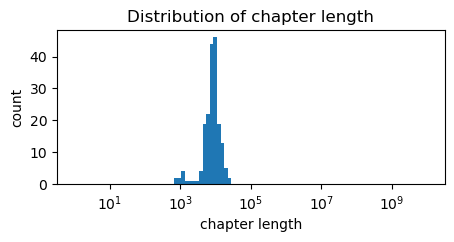

Number of chapters:  186


In [15]:
with open(novel_path) as f:
    all_text = f.read()

for from_name,to_name in rename_map.items():
    all_text=all_text.replace(from_name,to_name)
print('replace {0} names'.format(len(rename_map)))

import re
all_text=re.sub(r'\r', '', all_text)
all_text=re.sub(r'\n+', '\n', all_text)
all_text=re.sub(r'^\s+', '', all_text,flags=re.MULTILINE)

# re_chapter_title=re.compile(r'^(?=第.{1,9}(?=章|卷))', flags=re.MULTILINE)
# re_chapter_title=re.compile(r"^(.{1,8}章|.{1,8}篇|.{1,8}集|.{1,8}卷|后记|序)\s", flags=re.MULTILINE)
re_chapter_title=re.compile(r'^(第.{1,9}(?=章|卷|篇|集|话)|序章|序|后记)', flags=re.MULTILINE)
chapters=re.split(re_chapter_title,all_text)[1:]
chapters=[chapters[i]+chapters[i+1] for i in range(0,len(chapters),2)]
# append the chapter with <100 characters to the next chapter
for i in range(len(chapters)-1):
    if len(chapters[i])<100:
        chapters[i+1]=chapters[i]+chapters[i+1]
        chapters[i]=''
chapters=[chapter for chapter in chapters if chapter!='']

chapter_titles=[chapter.split('\n')[0] for chapter in chapters]

with open(chapter_titles_path,'w') as f:
    # pring chapter_titles, length of chapter
    for chapter_title, chapter in zip(chapter_titles, chapters):
        f.write(chapter_title+'\t'+str(len(chapter))+'\n')
print('saved to ',chapter_titles_path)


for i in range(min(20,len(chapters))):
    print(chapter_titles[i],len(chapters[i]))

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5, 2))
plt.hist([len(chapter) for chapter in chapters], bins=np.logspace(0, 10, 100))
plt.xscale('log');plt.xlabel('chapter length');plt.ylabel('count');plt.title('Distribution of chapter length');plt.show()
print('Number of chapters: ', len(chapters))

In [16]:
from langchain.schema import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter=RecursiveCharacterTextSplitter(chunk_size=chunk_len,chunk_overlap=0)

documents=[Document(page_content=chapter,metadata={'title':title,'chapter_id':i}) for i,(chapter,title) in enumerate(zip(chapters,chapter_titles))]
documents=text_splitter.split_documents(documents)

from tqdm.auto import tqdm
import json,os
if not os.path.exists(novel_chunk_dir):
    os.mkdir(novel_chunk_dir)

def reload_chunks(slient=False):
    global chunks
    chunks={}
    for iDocument,document in tqdm(enumerate(documents),total=len(documents)):
        chunks[iDocument]={
            'title':document.metadata['title'],
            'text':document.page_content,
            'id':iDocument,
            'chapter_id':document.metadata['chapter_id'],
        }
        chunk_path=os.path.join(novel_chunk_dir,'CHUNK_{0:05d}.json'.format(iDocument))
        with open(chunk_path,'w',encoding='utf-8') as f:
            json.dump(chunks[iDocument],f,ensure_ascii=False)
            if not slient: print('saved to ',chunk_path)
    chunks={k:v for k,v in sorted(chunks.items())}

reload_chunks(slient=True)
print('Generated {0} chunks'.format(len(chunks)))

usd_per_token=0.002/1000
tokens_per_character=2.03
len_multiplier=1+.1+1+.7
cost=sum([len(doc.page_content)*tokens_per_character*len_multiplier for doc in documents])*usd_per_token
print('Estimated Cost of distilling: {0:.2f} USD'.format(cost))

import os
if not os.path.exists(novel_chunk_dir):
    os.mkdir(novel_chunk_dir)


  0%|          | 0/2327 [00:00<?, ?it/s]

Generated 2327 chunks
Estimated Cost of distilling: 18.41 USD


# 将小说转换成json跑团记录

In [17]:
from langchain.chains.base import Chain
import json
import re
from my_chains import Text2JsonChain

### 总结chunk以提升bg_hint性能和json转换性能

In [18]:
class StorySummaryChain(Chain):
    llm:object=None
    get_bg_hint:object=None
    bg_hint_num:int=10
    bg_hint_len:int=400
    @property
    def input_keys(self):
        return ['text']
    @property
    def output_keys(self):
        return ['summary']
    prmopt='''可能有关的背景信息：（不要加入到回复中）
{background}
【前情提要：{retrospect}】
问：请简要总结下面的小说片段，不要加入自己的想法，请忠实于原著。不要加入没有意思的套话，只要总结出小说中的主要内容即可。
{text}
答：'''
    def _call(self,inputs:dict)->dict:
        inputs['retrospect']=inputs.get('retrospect','（无）')
        if self.get_bg_hint is not None:
            inputs['background']=self.get_bg_hint(inputs['text'],k=self.bg_hint_num,max_text_len=self.bg_hint_len)
        else:
            inputs['background']='（无）'
        query=self.prmopt.format(**inputs)
        print('requesting summary')
        response=self.llm(query)
        return {'summary':response}

story_summary_chain=StorySummaryChain(llm=llm,get_bg_hint=get_bg_hint,
    bg_hint_len=bg_hint_len)

# chunk=chunks[30]
# bg_hint=get_bg_hint(chunk['text'])
# print('使用未经总结的文本搜索到的背景知识：')
# print(bg_hint)
# llm.show_query=llm.show_response=True
# response=story_summary_chain(chunk)
# llm.show_query=llm.show_response=False
# bg_hint=get_bg_hint(response['summary'])
# print('使用总结后的文本搜索到的背景知识：')
# print(bg_hint)

### 生成json跑团记录的函数

In [19]:
class Story2JsonChain(Text2JsonChain):
    get_bg_hint:object=None
    bg_hint_num:int=10
    bg_hint_len:int=400
    summary_len:int=100
    retrospect_len:int=100
    story_summary_chain:object=None
    prompt:str='''{background}
【前情提要：{retrospect}】
【本段概要：{summary}】
提取动作act，对话say和内心独白think，标注主语char，推测表情expression，标注背景信息或事件info
输出格式：[
    {{"info":"小明是个中学生，很笨拙"}},
    {{"info":"下雨了，小明看到了一只小猫"}},
    {{"char":"小明", "expression":"惊讶", "say":"什么？！"}},
    {{"char":"小明", "act":"跳起来"}},
    {{"info":"小明落地没站稳，摔倒了"}},
    {{"char":"小明", "think":"好疼啊"}}
]
类似TRPG，不同角色提出act，think，say的请求。DM在info中提供反馈和信息。
say，think，act，要求照抄原文，并标注清楚char。
确保json格式正确。
有些字被打错成了发音相似的字，请修正。
不加自己的推测想法，请忠实于原著。不要加入没有意思的套话。请不要把角色名搞混淆。
可能有关的背景信息：（不要加入到回复中）
文本：
{text}
json：'''
    @property
    def output_keys(self):
        return super().output_keys+['summary','background','retrospect']
    def _call(self,inputs:dict)->dict:
        summary=self.story_summary_chain(inputs)['summary'] if self.story_summary_chain is not None else '（无）'
        bghint_input=summary if self.story_summary_chain is not None else inputs['text']
        bg_hint=self.get_bg_hint(bghint_input,k=self.bg_hint_num,max_text_len=self.bg_hint_len) if self.get_bg_hint is not None else '（无）'
        retrospect=inputs.get('retrospect','（无）')

        inputs['summary']=summary.replace('\n','').strip()[:self.summary_len]
        inputs['background']=bg_hint[-self.bg_hint_len:]
        inputs['retrospect']=retrospect.replace('\n','').strip()[-self.retrospect_len:]

        print('requesting story2json')
        outputs=super()._call(inputs)
        outputs['summary']=summary.replace('\n','')
        outputs['background']=bg_hint
        outputs['retrospect']=retrospect.replace('\n','')
        return outputs

story2json_chain=Story2JsonChain(llm=llm,get_bg_hint=get_bg_hint,story_summary_chain=story_summary_chain,
                                    bg_hint_len=bg_hint_len,retrospect_len=retrospect_len,summary_len=summary_len)

# chunk=chunks[3]
# llm.show_query=llm.show_response=True
# chunk['retrospect']=story_summary_chain(chunks[chunk['id']-1])['summary']
# response=story2json_chain(chunk)
# llm.show_query=llm.show_response=False
# print(response)

### 遍历所有chunk，生成json跑团记录

In [23]:
limit_per_run=9999

llm.show_query=llm.show_response=False

import os,time
if not os.path.exists(distilled_log_dir):
    os.mkdir(distilled_log_dir)

def reload_responses(slient=False):
    global chunks
    for iChunk,chunk in chunks.items():
        response_path=os.path.join(distilled_log_dir, f'RESPONSE_{iChunk}.json')
        if os.path.exists(response_path):
            if not slient: print('load existing', response_path)
            with open(response_path,'r',encoding='utf-8') as f:
                chunks[iChunk]=json.load(f)

reload_chunks(slient=True)
reload_responses(slient=True)

failed_iChunk_this_run=set()
irun=0
while True:
    time.sleep(.5)
    # find an iChunk not processed and not failed
    reload_chunks(slient=True)
    reload_responses(slient=True)
    found=False
    for iChunk,chunk in chunks.items():
        response_path=os.path.join(distilled_log_dir, f'RESPONSE_{iChunk}.json')
        failed_response_path=os.path.join(distilled_log_dir, f'FAILED_{iChunk}.txt')
        if not os.path.exists(response_path) and iChunk not in failed_iChunk_this_run and 'content' not in chunk:
            found=True
            break
    if not found:
        break
    # start working
    chunk=chunks[iChunk]
    if iChunk-1 in chunks and chunk['chapter_id']==chunks[iChunk-1]['chapter_id']:
        chunk['retrospect']=chunks[iChunk-1].get('summary','（无）')
    else:
        chunk['retrospect']='（无）'
    print('Processing Query', iChunk, 'with title',chunk['title'],end='...\n')
    response=story2json_chain(chunk)
    if response['content'] is None:
        print('failed', response_path, 'with error', response['error'],end='...\t')
        with open(failed_response_path, 'w') as f:
            f.write(response['response'])
        print('saved to', failed_response_path)
        with open(response_path, 'w') as f:
            response['error']=repr(response['error'])
            json.dump(response, f,ensure_ascii=False,indent=4)
        print('summary:',repr(response['summary']))
        print('saved to', response_path)
        failed_iChunk_this_run.add(iChunk)
    else:
        with open(response_path, 'w') as f:
            json.dump(response, f,ensure_ascii=False,indent=4)
        print('summary:',repr(response['summary']))
        print('saved to', response_path)
    irun+=1
    if irun>=limit_per_run:
        break

        

  0%|          | 0/2327 [00:00<?, ?it/s]

  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 124 with title 第零卷 塔芭莎的冒险 塔芭莎与赌徒...
requesting summary
requesting story2json
Extra data: line 2 column 1 (char 33) {"char":"男孩儿", "say":"你，不去跳舞吗？"}
{"char":"塔芭莎", "think":"（没有人会邀请我啊）"}
{"info":"突然，一个赌徒闯入了舞会，想要挑战学院的学
failed ./output_zero/distilled_log/RESPONSE_124.json with error Extra data: line 2 column 1 (char 33)...	saved to ./output_zero/distilled_log/FAILED_124.txt
summary: '在特里斯汀魔法学院的弗利古舞会上，塔芭莎因为身材和性格的原因被所有男生忽视，只能默默地在一旁料理食物。突然，一个赌徒闯入了舞会，想要挑战学院的学生。塔芭莎的使魔希儿菲朵接受了挑战，但被赌徒轻松打败。塔芭莎决定挑战赌徒，用自己的风系魔法打败了他，赢得了学生们的尊敬和赞扬。'
saved to ./output_zero/distilled_log/RESPONSE_124.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 206 with title 第零卷 塔芭莎的冒险 塔芭莎与军港...
requesting summary
requesting story2json
summary: '塔芭莎和库尔凯在冯?泽尔布斯特官邸中照顾受伤的苛尔贝尔。特里斯汀同阿尔比翁间的战争已经开始半年，库尔凯的母国凯尔马尼亚和特里斯汀结成同盟，整理军备并开始进攻阿尔比翁。阿尔比翁派遣佣兵队前往特里斯汀魔法学院挟持贵族子弟作为人质，苛尔贝尔挺身而出击毙佣兵队队长门努威尔，但自己也身受重伤。为了瞒过想要找苛尔贝尔报仇的阿尼亚斯的眼睛，库尔凯谎称苛尔贝尔已经死了，并把他带到自己的本家。'
saved to ./output_zero/distilled_log/RESPONSE_206.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 842 with title 第五卷 托里斯塔尼亚的假日 第二章...
requesting summary
requesting story2json
Extra data: line 1 column 36 (char 35) {"char":"女孩子们", "think":"同情露易丝的处境"},
{"info":"露易丝和才人因为没有钱支付住宿和食物费用而被迫卖艺，扮成马戏团的人为路人制造假身份。"},
{"char":
failed ./output_zero/distilled_log/RESPONSE_842.json with error Extra data: line 1 column 36 (char 35)...	saved to ./output_zero/distilled_log/FAILED_842.txt
summary: '露易丝和才人因为没有钱支付住宿和食物费用而被迫卖艺，扮成马戏团的人为路人制造假身份。他们被一个奇怪的男人斯卡隆提供住宿，但要求露易丝到他的店里帮忙。露易丝被迫穿上性感的服装，向店员们打招呼并开始工作。店里的生意非常好，才人也被赋予了清洗餐具的工作。'
saved to ./output_zero/distilled_log/RESPONSE_842.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 870 with title 第五卷 托里斯塔尼亚的假日 第四章...
requesting summary
requesting story2json
Extra data: line 2 column 1 (char 112) {"info":"楚连努作为征税官来到“魅惑之妖精”亭，店长斯卡隆试图找借口拒绝他，但被楚连努揭穿。客人们因为楚连努的威胁而离开，只剩下洁西卡和才人。洁西卡对楚连努的行为感到愤怒，才人则对这种权威欺压
failed ./output_zero/distilled_log/RESPONSE_870.json with error Extra data: line 2 column 1 (char 112)...	saved to ./output_zero/distilled_log/FAILED_870.txt
summary: '楚连努作为征税官来到“魅惑之妖精”亭，店长斯卡隆试图找借口拒绝他，但被楚连努揭穿。客人们因为楚连努的威胁而离开，只剩下洁西卡和才人。洁西卡对楚连努的行为感到愤怒，才人则对这种权威欺压百姓的行为感到不满。'
saved to ./output_zero/distilled_log/RESPONSE_870.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 872 with title 第五卷 托里斯塔尼亚的假日 第四章...
requesting summary
requesting story2json
Extra data: line 1 column 46 (char 45) {"char":"楚连努", "say":"唔，就让我楚连努大人来确认一下你的大小吧。"},
{"char":"楚连努", "act":"触碰露易丝的胸部"},
{"char":"露易丝", "exp
failed ./output_zero/distilled_log/RESPONSE_872.json with error Extra data: line 1 column 46 (char 45)...	saved to ./output_zero/distilled_log/FAILED_872.txt
summary: '在一家店里，露易丝作为侍女为贵族们斟酒，被楚连努嘲笑并触碰胸部，感到害怕和发抖。才人为了保护露易丝而与楚连努发生冲突，最终被楚连努手下的贵族包围。才人自称获得了传说中的力量，但发现他的德尔弗伦格不见了。'
saved to ./output_zero/distilled_log/RESPONSE_872.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 892 with title 第五卷 托里斯塔尼亚的假日 第五章...
requesting summary
requesting story2json
Extra data: line 1 column 78 (char 77) {"char":"丘鲁克", "act":"端起红酒杯子", "expression":"认真", "say":"我来跟你分享一下我和露易丝的故事吧。"},
{"info":"丘鲁克的性格强气，表面风
failed ./output_zero/distilled_log/RESPONSE_892.json with error Extra data: line 1 column 78 (char 77)...	saved to ./output_zero/distilled_log/FAILED_892.txt
summary: '丘鲁克向琪尔可分享了她和露易丝的友谊故事，她的性格强气，表面风骚但还是很珍视自己外骚内闷，喜欢玩拼图和药草，讨厌下雨和露易丝。同时，她是一个三角级魔法师，魔法属性为火，使魔是火蜥蜴弗雷姆。在故事中，她与露易丝最初并不要好，但后来成为好友。'
saved to ./output_zero/distilled_log/RESPONSE_892.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 949 with title 第五卷 托里斯塔尼亚的假日 第十二章...
requesting summary
requesting story2json
Extra data: line 1 column 48 (char 47) {"info":"里修蒙来到剧场观看演出，露易丝和亚尼艾斯在剧场附近埋伏，等待着目标出现。"},
{"char":"里修蒙", "expression":"大模大样", "act":"抬头看着剧场，直
failed ./output_zero/distilled_log/RESPONSE_949.json with error Extra data: line 1 column 48 (char 47)...	saved to ./output_zero/distilled_log/FAILED_949.txt
summary: '里修蒙来到剧场观看演出，露易丝和亚尼艾斯在剧场附近埋伏，等待着目标出现。露易丝因为昨晚没合眼而筋疲力尽，看到才人和安丽埃塔出现后喊出他们的名字。'
saved to ./output_zero/distilled_log/RESPONSE_949.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1030 with title 第六卷 赎罪的赤炎石 第五章 二十年前的火灾...
requesting summary
requesting story2json
Extra data: line 1 column 64 (char 63) {"info":"亚尼艾斯在王军资料库中找到了消灭她村子的部队的资料，发现这个小队是魔法研究所试验小队，全部成员都是贵族。"},
{"char":"亚尼艾斯", "think":"这个小队就是杀死我家
failed ./output_zero/distilled_log/RESPONSE_1030.json with error Extra data: line 1 column 64 (char 63)...	saved to ./output_zero/distilled_log/FAILED_1030.txt
summary: '亚尼艾斯在王军资料库中找到了消灭她村子的部队的资料，发现这个小队是魔法研究所试验小队，全部成员都是贵族。她决定利用这个机会复仇，但最高司令长官德?坡瓦奇对她们没什么好感，不让她们参加亚尔比昂征伐作战。'
saved to ./output_zero/distilled_log/RESPONSE_1030.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1119 with title 第七卷 银色的降临祭 第二章 妖精...
requesting summary
requesting story2json
Expecting property name enclosed in double quotes: line 4 column 37 (char 144) [
    {"info":"露易丝感到愤怒和失望，因为才人没有回来。"},
    {"char":"露易丝", "expression":"愤怒", "say":"不可原谅！骗人的家伙！讨厌你！讨
failed ./output_zero/distilled_log/RESPONSE_1119.json with error Expecting property name enclosed in double quotes: line 4 column 37 (char 144)...	saved to ./output_zero/distilled_log/FAILED_1119.txt
summary: '露易丝感到愤怒和失望，因为才人没有回来。她开始怒骂才人，并对他的“喜欢”提出质疑。'
saved to ./output_zero/distilled_log/RESPONSE_1119.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1193 with title 第七卷 银色的降临祭 第八章 戈利亚王...
requesting summary
requesting story2json
Extra data: line 1 column 134 (char 133) {"info":"戈利亚王国是哈尔吉尼亚大陆人口最多的国家，也是魔法先进国。首都吕特斯有一条名为西雷的河流，中间夹着一个被称之为“旧街市”的大型河中沙洲。现在政治中心位于郊外的维撒提尔宫殿。国王约瑟夫
failed ./output_zero/distilled_log/RESPONSE_1193.json with error Extra data: line 1 column 134 (char 133)...	saved to ./output_zero/distilled_log/FAILED_1193.txt
summary: '本章主要描述了戈利亚王国的背景和国王约瑟夫的形象，以及他喜欢的古怪游戏。同时，贵妇人找到了国王想要的东西，但具体内容未透露。'
saved to ./output_zero/distilled_log/RESPONSE_1193.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1292 with title 第八卷 望乡的小夜曲 第六章 诸国会议...
requesting summary
requesting story2json
Extra data: line 1 column 61 (char 60) {"info":"各国贵人们聚集在亚尔比昂的首都伦迪纽姆参加名为“诸国会议”的晚会，展开对鸟肉的分配份额的激烈争夺。"},
{"info":"伦迪纽姆是一个有着相对清新气息的城市，中心部分有整齐排列的
failed ./output_zero/distilled_log/RESPONSE_1292.json with error Extra data: line 1 column 61 (char 60)...	saved to ./output_zero/distilled_log/FAILED_1292.txt
summary: '在小说中，各国的贵人们聚集在亚尔比昂的首都伦迪纽姆参加名为“诸国会议”的晚会，展开对鸟肉的分配份额的激烈争夺。托里斯汀王国的女王安丽埃塔也是其中一名出席者。描述了伦迪纽姆的历史和亚尔比昂空军的强大，但现在的亚尔比昂已经不再是强国，而是一只被拔掉了翅膀、剥掉了爪子的鸟儿。'
saved to ./output_zero/distilled_log/RESPONSE_1292.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1499 with title 第十卷 伊瓦尔迪的勇者 第二章 精灵...
requesting summary
requesting story2json
Extra data: line 1 column 61 (char 60) {"info":"塔芭莎来到了她母亲生活的老宅前，回想起昨晚被撕掉的判决信，意识到自己的母亲被当做人质，要求她投降。"},
{"info":"塔芭莎决定去夺回母亲，但她的使魔希儿菲朵担心她的安全。"}
failed ./output_zero/distilled_log/RESPONSE_1499.json with error Extra data: line 1 column 61 (char 60)...	saved to ./output_zero/distilled_log/FAILED_1499.txt
summary: '塔芭莎来到了她母亲生活的老宅前，回想起昨晚被撕掉的判决信，意识到自己的母亲被当做人质，要求她投降。她决定去夺回母亲，但她的使魔希儿菲朵担心她的安全。塔芭莎打算战斗，但也知道加里亚政府会派出强力魔法师来封住她。'
saved to ./output_zero/distilled_log/RESPONSE_1499.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1521 with title 第十卷 伊瓦尔迪的勇者 第四章 女王和骑士们...
requesting summary
requesting story2json
Extra data: line 1 column 29 (char 28) {"info":"伊尔库库带来的情报让气氛沉重了起来"},
{"char":"才人", "think":"为什么塔芭莎会一个人去？"},
{"char":"才人", "think":"恐怕是不想再给我
failed ./output_zero/distilled_log/RESPONSE_1521.json with error Extra data: line 1 column 29 (char 28)...	saved to ./output_zero/distilled_log/FAILED_1521.txt
summary: '才人得到伊尔库库提供的情报，得知塔芭莎被囚禁在加里亚王国，决定前往救援。但是有人提出这是做不到的，才人决定下定决心行动，并得到部分人的支持。'
saved to ./output_zero/distilled_log/RESPONSE_1521.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1532 with title 第十卷 伊瓦尔迪的勇者 第五章 兄弟...
requesting summary
requesting story2json
Invalid control character at: line 5 column 159 (char 401) [
    {"info":"精灵的使者贝塔夏尔卿向加里亚王约瑟夫陈述了精灵们对于“王”这个称呼的不满，并告诉约瑟夫恶魔之门最近变得很活跃，认为这是虚无之力的影响。"},
    {"char":"贝
failed ./output_zero/distilled_log/RESPONSE_1532.json with error Invalid control character at: line 5 column 159 (char 401)...	saved to ./output_zero/distilled_log/FAILED_1532.txt
summary: '精灵的使者贝塔夏尔卿向加里亚王约瑟夫陈述了精灵们对于“王”这个称呼的不满，并告诉约瑟夫恶魔之门最近变得很活跃，认为这是虚无之力的影响。约瑟夫表示精灵的神圣之力被称为恶魔的力量，但他们并不喜欢争斗，希望能够共存。贝塔夏尔则希望约瑟夫能够使用他的影响力，来压制想靠近恶魔之门的一派。'
saved to ./output_zero/distilled_log/RESPONSE_1532.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1546 with title 第十卷 伊瓦尔迪的勇者 第六章 被囚禁的六人...
requesting summary
requesting story2json
Extra data: line 2 column 1 (char 133) {"char":"苛尔贝尔", "expression":"微笑", "say":"因此，我们要骑马穿过国境，向泽尔布斯特小姐知道的拉古德利安湖畔的旧奥尔良公馆前进。那里是塔芭莎小姐的本家。应该会得到
failed ./output_zero/distilled_log/RESPONSE_1546.json with error Extra data: line 2 column 1 (char 133)...	saved to ./output_zero/distilled_log/FAILED_1546.txt
summary: '苛尔贝尔和骑士队的队员们制定了营救计划，决定从陆路向凯尔马尼亚前进，以避免被追捕者发现。塔芭莎醒来后发现自己被带到了阿含布拉城，与贝塔夏尔对话询问母亲的下落。'
saved to ./output_zero/distilled_log/RESPONSE_1546.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1608 with title 第十一卷 追忆的二重奏 第一章 冯·泽尔布斯特...
requesting summary
requesting story2json
summary: '才人在凯尔马尼亚森林中的冯·泽尔布斯特城堡中醒来，做了一个关于故乡的梦，梦见母亲在做他喜欢的炸肉饼，但母亲的面容突然变成了塔芭莎的母亲，让他感到惊恐。他起床后发现旁边的床上没有马利寇尔奴和基修，露易丝告诉他大家都已经去吃午饭了。才人回忆起五天前他们一行人顺利穿越国境，逃脱了加里亚军的检查，但发现加里亚王政府并不为直属军以外的部队着想。最让他们觉得幸运的是被称为东蔷薇骑士团的精锐骑士队拦住了。'
saved to ./output_zero/distilled_log/RESPONSE_1608.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1711 with title 第十一卷 追忆的二重奏 第十章 二重奏之心...
requesting summary
requesting story2json
summary: '露易丝和尤尔姆冈特对话，尤尔姆冈特攻击露易丝一行人，露易丝被举起来后想起才人，但决定不呼唤他的名字。尤尔姆冈特威胁要踩死他们，露易丝试图使用虚无魔法，但被尤尔姆冈特指出她已经失去了能力，最终被扔向地面。'
saved to ./output_zero/distilled_log/RESPONSE_1711.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1712 with title 第十一卷 追忆的二重奏 第十章 二重奏之心...
requesting summary
requesting story2json
summary: '露易丝被尤尔姆冈特攻击后重重摔到地上，无法动弹。尤尔姆冈特威胁要踩死她们，露易丝试图使用虚无魔法，但被指出已经失去能力。希儿菲朵救出了露易丝，才人也出现在那里。露易丝责备才人和塔芭莎没有帮她，才人则抱怨露易丝做的事情都是多余的，让他想起了一整年的事情。露易丝则认为这样可以让才人专心寻找回去的方法。'
saved to ./output_zero/distilled_log/RESPONSE_1712.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1713 with title 第十一卷 追忆的二重奏 第十章 二重奏之心...
requesting summary
requesting story2json
summary: '在这段小说片段中，露易丝和才人发生了激烈的争吵，才人指责露易丝的行为都是多余的，让他想起了一整年的事情。露易丝则认为这样可以让才人专心寻找回去的方法。最后，才人揭露了露易丝对他的喜欢只是因为同情和无奈，而露易丝则感到自己的血液聚集到头部，两人的关系变得更加紧张。'
saved to ./output_zero/distilled_log/RESPONSE_1713.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1714 with title 第十一卷 追忆的二重奏 第十章 二重奏之心...
requesting summary
requesting story2json
summary: '才人和露易丝发生激烈争吵，才人揭露露易丝对他的喜欢只是同情和无奈，两人的关系变得更加紧张。同时，才人和尤尔姆冈特展开激烈战斗，尤尔姆冈特展现出超乎寻常的速度和灵巧，才人勉力抵挡。'
saved to ./output_zero/distilled_log/RESPONSE_1714.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1715 with title 第十一卷 追忆的二重奏 第十章 二重奏之心...
requesting summary
requesting story2json
summary: '才人和尤尔姆冈特展开激烈战斗，但才人的剑无法对其造成伤害。塔芭莎使用虚无魔法将才人救起，并让他继续上次的事情。突然，塔芭莎吻了才人，露易丝目睹了这一幕，震惊不已。'
saved to ./output_zero/distilled_log/RESPONSE_1715.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1716 with title 第十一卷 追忆的二重奏 第十章 二重奏之心...
requesting summary
requesting story2json
summary: '露易丝目睹塔芭莎和才人的亲密举动后，愤怒爆发，咏唱了爆发魔法，成功摧毁了尤尔姆冈特的铠甲。塔芭莎和才人都被震惊了。'
saved to ./output_zero/distilled_log/RESPONSE_1716.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1717 with title 第十一卷 追忆的二重奏 第十章 二重奏之心...
requesting summary
requesting story2json
summary: '小说片段描述了才人和露易丝等人在战胜尤尔姆冈特后的场景。伙伴们为他们的胜利欢呼，但库尔凯和基修提醒才人不要再冒险。露易丝则质问才人之前与塔芭莎的亲密举动，才人被拖走后，缪兹尼多尼伦思考着能否用精灵魔法制造出能承受爆炸的铠甲。'
saved to ./output_zero/distilled_log/RESPONSE_1717.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1718 with title 第十一卷 追忆的二重奏 第十一章 终章...
requesting summary
requesting story2json
summary: '在船上，才人和露易丝进行了一番对话，露易丝向才人道歉并询问他是否没事。才人则指责露易丝打他太狠，并表示自己找到了想做的事情的感觉。露易丝则表现出对才人的喜欢，并最终得到了才人的承认。他们讨论了回去的方法和酱汤。'
saved to ./output_zero/distilled_log/RESPONSE_1718.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1719 with title 第十一卷 追忆的二重奏 第十一章 终章...
requesting summary
requesting story2json
summary: '露易丝向才人表达了自己对他的喜欢，并得到了才人的承认。露易丝开始怀疑自己的感情是否真实，但最终通过亲吻确认了自己的感情。她还担心自己的精神力不够强，无法控制自己的情绪，可能会失去才人。'
saved to ./output_zero/distilled_log/RESPONSE_1719.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1720 with title 第十一卷 追忆的二重奏 第十一章 终章...
requesting summary
requesting story2json
summary: '露易丝向才人表达了自己对他的喜欢，并通过亲吻确认了自己的感情。尽管露易丝担心自己的精神力不够强，无法控制自己的情绪，可能会失去才人，但才人明白露易丝的感情是真实的，他们在船上热吻时，才人想到男人的生存意义就是守护自己为之心动的女孩。'
saved to ./output_zero/distilled_log/RESPONSE_1720.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1721 with title 第十二卷 妖精们的假日 序章...
requesting summary
requesting story2json
summary: '在特里斯汀魔法学院的阿尔维兹食堂，才人和基修等人发现了新入学的半妖精蒂法尼亚，她因为拥有混合阿尔比翁和妖精血统的美貌而备受关注。蒂法尼亚为了掩盖自己的半妖精身份，戴着帽子上课，但被允许进入食堂。'
saved to ./output_zero/distilled_log/RESPONSE_1721.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1722 with title 第十二卷 妖精们的假日 序章...
requesting summary
requesting story2json
summary: '新入学的半妖精蒂法尼亚因为拥有混合阿尔比翁和妖精血统的美貌备受男学生们的关注，她被十几个男学生围绕着，不管她喝茶还是吃菜都会有人代为斟满或端过来，让她感到无所适从。男学生们的视线在她肌肤白的美丽面容和某一点之间交互移动着，让基修感叹她的人气太高了。'
saved to ./output_zero/distilled_log/RESPONSE_1722.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1723 with title 第十二卷 妖精们的假日 序章...
requesting summary
requesting story2json
summary: '基修和马利寇尔奴认为蒂法尼亚的胸部是一种能让男性为之疯狂的魔法兵器，他们试图接近蒂法尼亚，但被水精灵骑士队的队员们拦住。基修在蒂法尼亚身旁时试图碰触她的胸部，被蒙莫朗西用水柱包裹并带离现场。雷纳尔建议才人不要理会这些低能儿。'
saved to ./output_zero/distilled_log/RESPONSE_1723.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1724 with title 第十二卷 妖精们的假日 序章...
requesting summary
requesting story2json
summary: '基修试图接近蒂法尼亚的胸部，但被水精灵骑士队的队员们拦住。雷纳尔指出才人平时不会做这种事情，但现在的气量让他感到困惑。才人被少女们围绕，接受了附有冷气魔法的布丁，让水精灵骑士队的队员们羡慕不已。'
saved to ./output_zero/distilled_log/RESPONSE_1724.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1725 with title 第十二卷 妖精们的假日 序章...
requesting summary
requesting story2json
summary: '才人被水精灵骑士队的队员们围绕，女孩子们对他充满崇拜和赞美。才人感到很愉快，但也意识到自己被人斜眼看着。他试图保持风度，吸收“优越感”，并享受这种受欢迎的感觉。'
saved to ./output_zero/distilled_log/RESPONSE_1725.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1726 with title 第十二卷 妖精们的假日 序章...
requesting summary
requesting story2json
summary: '才人在被女孩子们围绕时感到受欢迎，试图保持风度并享受优越感。但他在船上与露易丝亲热时被拒绝，因为露易丝想选个地方再继续。才人受到伤害，但他开始理解露易丝的心意，认为她可能喜欢他，但还没有到允许他做任何事情的程度。'
saved to ./output_zero/distilled_log/RESPONSE_1726.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1727 with title 第十二卷 妖精们的假日 序章...
requesting summary
requesting story2json
summary: '才人想起露易丝曾经扮过的黑猫样子，开始思考如何驯服猫这种动物。他想到猫通常会先观察情况，然后放松警惕接近你，最终靠在你身边蹭你。才人开始理解露易丝的心意，认为她可能喜欢他，但还没有到允许他做任何事情的程度。露易丝则在从阿尔比翁回来的当夜，勇敢地向始祖普利米尔进行长长的忏悔。'
saved to ./output_zero/distilled_log/RESPONSE_1727.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1728 with title 第十二卷 妖精们的假日 序章...
requesting summary
requesting story2json
summary: '露易丝向始祖普利米尔进行忏悔，担心才人会和其他女孩子发生关系。回到房间后，露易丝紧张地装睡，才人最终伸手到她肩上。'
saved to ./output_zero/distilled_log/RESPONSE_1728.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1729 with title 第十二卷 妖精们的假日 序章...
requesting summary
requesting story2json
summary: '才人在露易丝的房间里，想要对露易丝出手，但是露易丝担心西艾斯塔女仆会发现，最终才人伸手到露易丝肩上。露易丝感到心跳加速，才人将露易丝的睡裙推上去，露易丝闭上眼睛，脸胀得通红，呼吸和心跳都已慌乱。才人口中发出的是打呼声，露易丝感到焦急。'
saved to ./output_zero/distilled_log/RESPONSE_1729.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1730 with title 第十二卷 妖精们的假日 序章...
requesting summary
requesting story2json
summary: '露易丝试图对才人出手，但最终才人只是轻轻地碰了一下她的肩膀。才人假装睡觉，露易丝感到愤怒。她想要惩罚才人，但最终还是决定让他睡觉。露易丝出去散步等待才人，但他从未出现。露易丝感到失望，但还是继续等待。'
saved to ./output_zero/distilled_log/RESPONSE_1730.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1731 with title 第十二卷 妖精们的假日 序章...
requesting summary
requesting story2json
summary: '露易丝因为才人没有出现而感到失望，开始画作品表达自己的愤怒。她画了一系列作品，其中才人被折磨的场景不断升级。露易丝最终意识到自己的愤怒需要控制，但她仍然对才人表现出严厉的态度。才人却没有意识到露易丝的真实情感。'
saved to ./output_zero/distilled_log/RESPONSE_1731.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1732 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(1)...
requesting summary
requesting story2json
summary: '露易丝和她的朋友们在学校食堂的露台上喝茶聊天，库尔凯谈论了一星期前在阿尔比翁的冒险经历，而蒙莫朗西则对跟着蒂法尼亚的男学生感到不满。露易丝则在眼睛充血，似乎在蓄积着什么。'
saved to ./output_zero/distilled_log/RESPONSE_1732.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1733 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(1)...
requesting summary
requesting story2json
summary: '露易丝因为朋友的话题引发了愤怒，但因为贵族的自尊心不能在众人面前发泄，所以她压制住了怒气。在路上遇到才人和他的龙骑士团，露易丝因为不能在众目睽睽之下发泄愤怒，所以她掐住自己的大腿压制住了怒气。最后，马利寇尔奴借走了露易丝的使魔。'
saved to ./output_zero/distilled_log/RESPONSE_1733.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1734 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(1)...
requesting summary
requesting story2json
summary: '露易丝因为朋友的话题引发了愤怒，但因为贵族的自尊心不能在众人面前发泄，所以她压制住了怒气。在路上遇到才人和他的龙骑士团，露易丝因为不能在众目睽睽之下发泄愤怒，所以她掐住自己的大腿压制住了怒气。最后，马利寇尔奴借走了露易丝的使魔。当晚，露易丝和才人之间的气氛异常尴尬，两人默默无语，连红酒也不能缓和气氛。西艾斯塔感到疑惑，不明白两人之间发生了什么事情。最终，三人躺在床上，背对着背，蜷缩在那里。'
saved to ./output_zero/distilled_log/RESPONSE_1734.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1735 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(1)...
requesting summary
requesting story2json
summary: '在小说片段中，露易丝因为白天才人的态度而愤怒，但在晚上她控制不住自己的情绪，向才人发泄了自己的不满。才人冷漠地回应了她，让露易丝感到悲伤和失望。最终，才人睡着了，露易丝仍然无法平静自己的情绪，对才人的态度感到困惑和疑惑。'
saved to ./output_zero/distilled_log/RESPONSE_1735.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1736 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(1)...
requesting summary
requesting story2json
summary: '露易丝因为才人的态度感到愤怒和失望，但在晚上无法控制自己的情绪，向才人发泄了不满。她开始怀疑才人是否真的喜欢自己，同时也担心才人会被其他女孩子吸引。她回想起白天从阿尔比翁带回来的金发妖精，感到不安。'
saved to ./output_zero/distilled_log/RESPONSE_1736.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1737 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(1)...
requesting summary
requesting story2json
summary: '露易丝因为怀疑才人是否真的喜欢自己，开始感到不安。她回想起白天从阿尔比翁带回来的金发妖精，担心才人会被其他女孩子吸引。在睡着后，才人观察着露易丝的睡脸，想着保持距离，但又忍不住想贴上去。'
saved to ./output_zero/distilled_log/RESPONSE_1737.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1738 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(1)...
requesting summary
requesting story2json
summary: '才人和露易丝之间的关系变得更加暧昧，但才人仍然坚持要找回去的方法。西艾斯塔提醒才人要解决帮助过她的人的问题，同时也表达了对才人的喜欢。两人之间的气氛变得微妙，但才人表示不喜欢分别的感觉。'
saved to ./output_zero/distilled_log/RESPONSE_1738.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1739 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(1)...
requesting summary
requesting story2json
summary: '才人在思考回去的方法和不想和露易丝分别之间矛盾着。西艾斯塔提醒他要享受现在，不要想太多。西艾斯塔对才人表达了喜欢，但才人拒绝了她。露易丝在睡梦中打到才人的头，才人重新盖好她的被子后闭上眼睛。'
saved to ./output_zero/distilled_log/RESPONSE_1739.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1740 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(1)...
requesting summary
requesting story2json
summary: '才人在思考蒂法尼亚的事情和自己与露易丝的矛盾，但西艾斯塔提醒他要享受现在。才人想去找蒂法尼亚，但担心她的秘密和压力。他决定明天去找她说话。'
saved to ./output_zero/distilled_log/RESPONSE_1740.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1741 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(2)...
requesting summary
requesting story2json
summary: '才人和基修、马利寇尔奴在阳台上观察女学生走过，基修和马利寇尔奴质疑才人是否还沉浸在露易丝的魔法中，才人用比喻告诉他们如何处理新旧骨头的问题。'
saved to ./output_zero/distilled_log/RESPONSE_1741.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1742 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(2)...
requesting summary
requesting story2json
summary: '基修和马利寇尔奴质疑才人是否还沉浸在露易丝的魔法中，才人用比喻告诉他们如何处理新旧骨头的问题。才人表示露易丝已经被他叼牢了，但他还没有完全驯服她。基修询问才人是否考虑留在这里，才人难为情地回答这只是吹的风。'
saved to ./output_zero/distilled_log/RESPONSE_1742.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1743 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(2)...
requesting summary
requesting story2json
summary: '才人和基修被问到如何处理“叼不到骨头的狗”的问题，他们无奈地笑了笑。在魔法学院的休息时间，蒂法尼亚感到疲劳，回忆起来到特里斯汀后的各种事情，包括与孤儿们的分别。'
saved to ./output_zero/distilled_log/RESPONSE_1743.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1744 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(2)...
requesting summary
requesting story2json
summary: '蒂法尼亚到达魔法学院后，感到疲劳和不适应。她被介绍给同学们，但她的美貌引起了其他人的嫉妒和纠缠。在这种环境下，三个男孩开始向她献殷勤，其中一个自称夏尔洛，想为她服务，但另一个人也想得到这个机会。'
saved to ./output_zero/distilled_log/RESPONSE_1744.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1745 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(2)...
requesting summary
requesting story2json
summary: '蒂法尼亚在魔法学院遇到了三个男孩，其中一个自称夏尔洛，想为她服务，但另一个人也想得到这个机会。五人左右的集团出现，邀请蒂法尼亚远足，但她因为不能被日光晒到而拒绝了。夏尔洛准备了一顶羽白帽，但蒂法尼亚不喜欢，离开了教室。夏尔洛被其他男孩攻击，而蒂法尼亚的崇拜者们开始激烈地争论谁应该邀请她远足。'
saved to ./output_zero/distilled_log/RESPONSE_1745.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1746 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(2)...
requesting summary
requesting story2json
summary: '贝亚托里斯是一名自认高贵的少女，她和她周围的少女们都嫉妒蒂法尼亚的受欢迎程度。她们认为蒂法尼亚是个“乡巴佬”，并且轻视她。贝亚托里斯自夸自己出生于库尔汀侯尔弗大公家，与特里斯汀王家有血缘关系，是一个独立国的贵族。她的追随者们也为她的家族背景而自豪。'
saved to ./output_zero/distilled_log/RESPONSE_1746.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1747 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(2)...
requesting summary
requesting story2json
summary: '蒂法尼亚在学校遭到同班同学贝亚托里斯和她的追随者的轻视和欺负，她离开教室跑到广场哭泣，担心孩子们和未来的生活。她的同班同学前来找她，其中一个女孩指责她不懂礼仪，还没有向另一个同学请安。'
saved to ./output_zero/distilled_log/RESPONSE_1747.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1748 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(2)...
requesting summary
requesting story2json
summary: '蒂法尼亚被同班同学贝亚托里斯和她的追随者轻视和欺负，她离开教室哭泣，担心未来的生活。贝亚托里斯和她的同伴找到她，介绍贝亚托里斯是库尔汀侯尔弗大公国的公主，蒂法尼亚因为在森林中长大，不了解外面的事情，称呼错误，被责问后向贝亚托里斯道歉。'
saved to ./output_zero/distilled_log/RESPONSE_1748.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1749 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(2)...
requesting summary
requesting story2json
summary: '蒂法妮娅被同班同学欺负，因为她不了解社交方式，被贝亚托里斯介绍为库尔汀侯尔弗大公国的公主后，她向贝亚托里斯道歉。但是其他女学生不满意，要求蒂法妮娅摘下帽子，她拒绝了，因为她混有妖精血统，如果被发现就会被赶出学校。女学生们开始争夺她的帽子，直到才人出现制止。'
saved to ./output_zero/distilled_log/RESPONSE_1749.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1750 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(2)...
requesting summary
requesting story2json
summary: '才人发现蒂法妮亚被女学生欺负，他制止了女学生的行为并提醒她们不要欺负人。莉捷特则指责才人不了解情况，认为被欺负的女孩是库尔汀侯尔弗大公国的公主。'
saved to ./output_zero/distilled_log/RESPONSE_1750.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1751 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(2)...
requesting summary
requesting story2json
summary: '才人在学院中制止女学生欺负蒂法妮亚时，被莉捷特指责不了解情况，认为被欺负的女孩是库尔汀侯尔弗大公国的公主。贝亚托里斯自称是该公主，不屑才人的身份，才人为了掩盖自己是异世界人的身份，编造自己来自罗巴&#8226;阿尔&#8226;卡利耶。贝亚托里斯并不害怕才人的近卫身份，才人感到不妙，但基修和蒙莫朗西的出现打破了僵局。'
saved to ./output_zero/distilled_log/RESPONSE_1751.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1752 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(2)...
requesting summary
requesting story2json
summary: '才人在学院中遇到自称是库尔汀侯尔弗公主的贝亚托里斯，为了掩盖自己是异世界人的身份，才人编造自己来自罗巴阿尔卡利耶。基修和蒙莫朗西出现打破僵局，但贝亚托里斯的出现让才人感到不妙。贝亚托里斯的身份让基修和蒙莫朗西变得恭敬，贝亚托里斯则对自己的追随者催促着快走，并对蒂法尼亚发出了命令。'
saved to ./output_zero/distilled_log/RESPONSE_1752.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1753 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(2)...
requesting summary
requesting story2json
summary: '才人得知基修和蒙莫朗西对贝亚托里斯如此恭敬的原因是因为他们的家族向她家借了钱。基修告诉才人贝亚托里斯是库尔汀侯尔弗公主，她的私家亲卫队“空中装甲骑士团”也在学院前驻扎。才人感到不妙，因为他之前曾被这个骑士团搭讪过。'
saved to ./output_zero/distilled_log/RESPONSE_1753.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1754 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(2)...
requesting summary
requesting story2json
summary: '才人得知库尔汀侯尔弗公主贝亚托里斯的私家亲卫队“空中装甲骑士团”在学院前驻扎，感到不安。基修告诉才人这支骑士团是库尔汀侯尔弗大公国最强的龙骑士团，而且在阿尔比翁战役中并没有参加联合军，因为是大公国珍爱的骑士团。才人担心骑士团会给自己和蒂法带来麻烦，但蒂法尼亚表示会自己解决。基修提醒才人不要惹怒外国公主，因为他们现在是近卫队。蒂法尼亚感谢才人的心意，表示自己会解决问题。'
saved to ./output_zero/distilled_log/RESPONSE_1754.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1755 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(2)...
requesting summary
requesting story2json
summary: '才人和露易丝讨论班里有人欺负蒂法尼亚的事情，才人想要帮助蒂法尼亚，但露易丝认为这是蒂法尼亚自己的问题，贵族应该自己处理自己的事情。露易丝提到自己曾经被同学们轻视，但是靠着贵族的尊严站起来了，才人意识到蒂法尼亚和自己一样是“虚无的背负者”，需要自己去面对和解决问题。'
saved to ./output_zero/distilled_log/RESPONSE_1755.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1756 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(2)...
requesting summary
requesting story2json
summary: '露易丝和才人讨论班里有人欺负蒂法尼亚的事情，露易丝认为贵族应该自己处理自己的事情，才人意识到蒂法尼亚和自己一样是“虚无的背负者”，需要自己去面对和解决问题。露易丝心生嫉妒，但因为不能说出口而感到羞耻和自责。'
saved to ./output_zero/distilled_log/RESPONSE_1756.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1757 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(3)...
requesting summary
requesting story2json
summary: '在修布尔兹夫人的土魔法课上，蒂法尼亚缺席了，让修布尔兹夫人感到为难。贝亚托里斯和她的手下们则坏笑着，暗示蒂法尼亚可能又戴上了面具。但是，蒂法尼亚最终还是出现了，穿着一件奇怪的袍子，让大家都感到惊讶。'
saved to ./output_zero/distilled_log/RESPONSE_1757.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1758 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(3)...
requesting summary
requesting story2json
summary: '蒂法尼亚在修布尔兹夫人的课上穿着母亲曾经穿过的袍子出现，被其他女孩子嘲笑。但当她摘下兜帽，露出长耳时，教室里的学生们陷入恐慌，认为她是精灵。修布尔兹夫人也惊讶不已，但蒂法尼亚向大家解释自己是半妖精，从未想过伤害任何人。虽然有些学生仍然害怕，但她的真诚打动了他们。'
saved to ./output_zero/distilled_log/RESPONSE_1758.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1759 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(3)...
requesting summary
requesting story2json
summary: '蒂法尼亚在修布尔兹夫人的课上被其他女孩子嘲笑，但当她摘下兜帽露出长耳时，教室里的学生们认为她是精灵而陷入恐慌。修布尔兹夫人也惊讶不已，但蒂法尼亚向大家解释自己是半妖精，从未想过伤害任何人。贝亚托里斯认为她是仇敌，但蒂法尼亚坚持自己爱着父母的血液。突然，骑士团冲进教室，保护贝亚托里斯并围住蒂法尼亚。蒂法尼亚警告他们不要使用恶魔的魔法。'
saved to ./output_zero/distilled_log/RESPONSE_1759.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1760 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(3)...
requesting summary
requesting story2json
summary: '蒂法尼亚在课堂上被其他学生嘲笑，但她解释自己是半妖精并从未想过伤害任何人。然而，贝亚托里斯认为她是仇敌，要求她接受异端审问。同时，才人在另一个教室担心蒂法尼亚是否被欺负，突然听到骑士团冲进教室保护贝亚托里斯并围住蒂法尼亚。'
saved to ./output_zero/distilled_log/RESPONSE_1760.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1761 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(3)...
requesting summary
requesting story2json
summary: '蒂法尼亚被带到魔法学院外草原的帐篷接受异端审问，被蓝色铠甲包裹住全身的可怕的骑士们将她围在中间。蒂法尼亚感到胆怯和束手无策，诅咒着自己的身世。她意识到妖精这种存在在这个世界被害怕、疏远和厌恶，因为她的母亲就因为是妖精而被杀害。蒂法尼亚颤抖着，感到自己也可能会像母亲一样被杀死。'
saved to ./output_zero/distilled_log/RESPONSE_1761.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1762 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(3)...
requesting summary
requesting story2json
summary: '蒂法妮娅被带到魔法学院外草原的帐篷接受异端审问，贝亚托里斯要求她证明自己不是异端。蒂法妮娅感到胆怯和束手无策，但注意到贝亚托里斯并没有憎恨之光，而是因为找到能让自己尝尽苦头的理由而高兴。蒂法妮娅愤怒地盯着贝亚托里斯，被打了一巴掌并被要求在滚开的锅中呆一分钟。学院学生们跑来围观，对龙骑士毫不畏惧。'
saved to ./output_zero/distilled_log/RESPONSE_1762.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1763 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(3)...
requesting summary
requesting story2json
summary: '蒂法妮娅被带到魔法学院外草原的帐篷接受异端审问，学生们围观。才人冲进来试图阻止审问，但被基修等人制止，因为妨碍审问会被认为是异端的同伙，会牵连到与自己有关系的人。贝亚托里斯给蒂法妮娅一次机会离开，但蒂法妮娅拒绝了。'
saved to ./output_zero/distilled_log/RESPONSE_1763.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1764 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(3)...
requesting summary
requesting story2json
summary: '蒂法妮娅拒绝了贝亚托里斯的要求回到库鲁登荷鲁夫大公国，表示她想看看外面的世界。学生们支持她，但贝亚托里斯下令空中装甲骑士团进行审问。才人试图阻止，但被制止。学生们希望才人能教训骑士团，但才人却跪地求情。'
saved to ./output_zero/distilled_log/RESPONSE_1764.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1765 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(3)...
requesting summary
requesting story2json
summary: '才人试图阻止蒂法被审问，但被制止。他向贝亚托里斯下跪请求不要审问蒂法，但被拒绝。才人试图出手，但被骑士团制止。学生们失望，才人心中难过。他想抓住特尔弗，但成功几率只有几十分之一。突然，青铜之哥雷姆出现，掀翻了大锅，基修手臂自己活动了。'
saved to ./output_zero/distilled_log/RESPONSE_1765.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1766 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(3)...
requesting summary
requesting story2json
summary: '基修·杜·格拉蒙挺身而出，带领水精灵骑士队与空中装甲骑士团对峙，保护蒂法不被审问。他展现出贵族的气度和勇气，让学生们感到振奋。贝亚托里斯命令骑士团进攻，但基修和水精灵骑士队并没有退缩。基修露出冷酷的笑容，展现出他的强大实力和决心。'
saved to ./output_zero/distilled_log/RESPONSE_1766.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1767 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(3)...
requesting summary
requesting story2json
summary: '基修带领水精灵骑士队与空中装甲骑士团对峙，保护蒂法不被审问。骑士队长咏唱出魔法，但被战少女用短枪接下来。水精灵骑士队和空中装甲骑士团展开魔法射击战，水精灵骑士队表现出战意旺盛和地利优势，而空中装甲骑士团因为自尊心影响无法骑龙，导致实力发挥不出来。观众的欢呼也影响了战斗结果，双方势均力敌。'
saved to ./output_zero/distilled_log/RESPONSE_1767.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1768 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(3)...
requesting summary
requesting story2json
summary: '在战斗中，水精灵骑士队和空中装甲骑士团展开激烈的魔法射击战，双方都负伤倒下，但被围观的学生们用水魔法治疗后又重新奔向战场。才人因手部受伤无法参加战斗，只能呆呆地看着。战斗中出现了互殴的情况，马利寇尔奴咬住一个骑士的头，让才人感到难过。'
saved to ./output_zero/distilled_log/RESPONSE_1768.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1769 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(3)...
requesting summary
requesting story2json
summary: '才人在手部受伤的情况下，冲进了激烈的魔法射击战场。战斗持续着，学生们用水魔法治疗伤员后重新奔向战场。马利寇尔奴咬住一个骑士的头，让才人感到难过。老师们对这场大乱战毫无办法，只得到奥斯曼氏的冷淡回答。'
saved to ./output_zero/distilled_log/RESPONSE_1769.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1770 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(4)...
requesting summary
requesting story2json
summary: '露易丝在听到外面的响动后，手握魔杖走出房间，西艾斯塔被她身上的黑气吓到了。同时，才人和龙骑士团正在打斗，基修和马利寇尔奴等人已经受伤，只剩下六人。'
saved to ./output_zero/distilled_log/RESPONSE_1770.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1771 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(4)...
requesting summary
requesting story2json
summary: '水精灵骑士队和空中装甲骑士团在激烈战斗中，双方都已经到达极限。才人和伙伴们虽然遍体鳞伤，但仍然感到快乐。在最后一刻，一个小光球出现并爆炸，将双方吹飞。随后，一个散发着非凡气息的粉发少女出现在场上。'
saved to ./output_zero/distilled_log/RESPONSE_1771.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1772 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(4)...
requesting summary
requesting story2json
summary: '在激烈的战斗中，一个散发着非凡气息的粉发少女出现在场上，她用强大的魔法结束了战斗。露易丝因为被打斗的声音吵醒，用虚无魔法阻止了众人，但因为被吵醒而非常愤怒。最后，露易丝使用了强大的爆炸魔法，将水精灵骑士队和空中装甲骑士团的全员击败。学生们惊叹于露易丝的强大力量。'
saved to ./output_zero/distilled_log/RESPONSE_1772.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1773 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(4)...
requesting summary
requesting story2json
summary: '在小说片段中，贝亚托里斯与露易丝发生了冲突，贝亚托里斯试图以自己的身份压制露易丝，但露易丝并不在意。贝亚托里斯想起自己家族与瓦利艾尔家族的关系，认为自己有胜算，但露易丝并不知道这些。贝亚托里斯暗示自己有王牌在手，但具体是什么并未透露。'
saved to ./output_zero/distilled_log/RESPONSE_1773.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1774 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(4)...
requesting summary
requesting story2json
summary: '在小说片段中，贝亚托里斯试图以自己的身份压制露易丝，但露易丝并不在意。贝亚托里斯暗示自己有王牌在手，但具体是什么并未透露。贝亚托里斯试图进行异端审问，但露易丝指出她没有司教的执照和审问认可书，周围学生开始指责贝亚托里斯，最终蒂法尼亚出现并被学生们认为有权裁决贝亚托里斯。'
saved to ./output_zero/distilled_log/RESPONSE_1774.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1775 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(4)...
requesting summary
requesting story2json
summary: '蒂法尼亚在学生们的围观下，跪下拉着贝亚托里斯的手，表示要做朋友。学生们惊讶不已，但蒂法尼亚坚持认为在学校里裁决他人是不合适的。贝亚托里斯因此哭泣，学院长奥斯曼氏出现并称赞蒂法尼亚的勇气和信念。'
saved to ./output_zero/distilled_log/RESPONSE_1775.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1776 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(4)...
requesting summary
requesting story2json
summary: '在学生们的围观下，蒂法尼亚跪下拉着贝亚托里斯的手，表示要做朋友。学院长奥斯曼氏出现并称赞蒂法尼亚的勇气和信念。奥斯曼氏宣布蒂法尼亚是女王陛下托付在学校的客人，并警告学生们不要侮辱她或让她对其血统作出解释。学生们开始接受蒂法尼亚，并和她握手。最后，学生们开始清理现场，把受伤的人送去医务室。奥斯曼氏向蒂法尼亚道歉，并称赞她是妖精之血的继承者。'
saved to ./output_zero/distilled_log/RESPONSE_1776.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1777 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(4)...
requesting summary
requesting story2json
summary: '在学院长奥斯曼氏的询问下，蒂法尼亚承认自己是半妖精，但当奥斯曼氏询问她的胸部是否真的很大时，蒂法尼亚感到非常尴尬。最终，奥斯曼氏因为听力不好而误解了问题，引起了一些混乱。之后，蒂法尼亚在学生们的接受下，开始适应自己在魔法学院的生活。同时，才人在医务室醒来，发现自己被一群女孩子围绕着照顾。'
saved to ./output_zero/distilled_log/RESPONSE_1777.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1778 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(4)...
requesting summary
requesting story2json
summary: '才人在医务室醒来后，发现自己的人气因为先低下头而跌落到谷底，相反地，直接冲过去打架的基修他们却因此人气大增。但是，马利寇尔奴向才人伸出大拇指，称呼他为“朋友”，让才人感到异常高兴，觉得自己已经有了朋友。此时，蒂法尼亚出现在医务室，坐到才人床边，感谢他的帮助。'
saved to ./output_zero/distilled_log/RESPONSE_1778.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1779 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(4)...
requesting summary
requesting story2json
summary: '才人在医务室醒来后，马利寇尔奴称呼他为“朋友”，让才人感到高兴。蒂法尼亚出现在医务室，感谢才人的帮助，并对自己身体内流淌的妖精之血感到羞愧。才人提醒蒂法尼亚曾对他说过“要对自己更有自信”的话，蒂法尼亚难为情地指出自己的胸部过大，感到烦恼。才人慌乱地否认是因为蒂法尼亚是朋友才这么说的。'
saved to ./output_zero/distilled_log/RESPONSE_1779.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1780 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(4)...
requesting summary
requesting story2json
summary: '蒂法尼亚请求才人确认她身体的某个部位是否真实，才人最终同意并感到混乱、欢喜和恐惧。蒂法尼亚动了，才人感受到了柔软和弹性，但由于紧张和欢喜，手掌的触觉变得迟钝了。最后，蒂法尼亚询问才人是否有奇怪的地方。'
saved to ./output_zero/distilled_log/RESPONSE_1780.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1781 with title 第十二卷 妖精们的假日 第一章 来自白之国的插班生(4)...
requesting summary
requesting story2json
summary: '才人在医务室里被露易丝和西艾斯塔发现，他的手握着蒂法尼亚的果实。露易丝和西艾斯塔认为才人需要治疗，尤其是他的命。才人突然跳出窗户，想要逃脱。在跳下去的瞬间，他想到了蒂法尼亚的身体，并建议她藏起胸部并穿宽松的衣服。'
saved to ./output_zero/distilled_log/RESPONSE_1781.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1782 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(1)...
requesting summary
requesting story2json
summary: '才人因为在医务室中抚摸了蒂法尼亚小姐的胸部而被迫写反省文，并在露易丝的监督下读出来。露易丝对才人的愤怒已经超越以往的等级，因为才人不仅没有遵守自己的决心，还摸了半妖精的胸部。才人被魔法所伤，动不了之后被带回房间，重复着暴力和强制反省。'
saved to ./output_zero/distilled_log/RESPONSE_1782.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1783 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(1)...
requesting summary
requesting story2json
summary: '才人因为在医务室中抚摸了蒂法尼亚小姐的胸部而被迫写反省文，并在露易丝的监督下读出来。露易丝对才人的愤怒已经超越以往的等级，因为才人不仅没有遵守自己的决心，还摸了半妖精的胸部。才人被魔法所伤，动不了之后被带回房间，重复着暴力和强制反省。在此期间，才人开始怀疑露易丝的行为是否因为她还是个孩子，但他也意识到自己的数学不好，不应该想这些事情。'
saved to ./output_zero/distilled_log/RESPONSE_1783.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1784 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(1)...
requesting summary
requesting story2json
summary: '才人因为在医务室中抚摸了蒂法尼亚小姐的胸部而被迫写反省文，并在露易丝的监督下读出来。露易丝对才人的愤怒已经超越以往的等级，因为才人不仅没有遵守自己的决心，还摸了半妖精的胸部。才人被魔法所伤，动不了之后被带回房间，重复着暴力和强制反省。在此期间，才人开始怀疑露易丝的行为是否因为她还是个孩子，但他也意识到自己的数学不好，不应该想这些事情。西艾斯塔询问才人关于蒂法尼亚的事情，让才人摸了她的胸部，但两人都没有什么反应。露易丝在才人被带回房间后继续施加暴力和强制反省，才人开始感到忍耐到极限。'
saved to ./output_zero/distilled_log/RESPONSE_1784.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1785 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(1)...
requesting summary
requesting story2json
summary: '才人因为在医务室中抚摸了蒂法尼亚小姐的胸部而被迫写反省文，并在露易丝的监督下读出来。露易丝对才人的愤怒已经超越以往的等级，因为才人不仅没有遵守自己的决心，还摸了半妖精的胸部。才人被魔法所伤，动不了之后被带回房间，重复着暴力和强制反省。在此期间，才人开始怀疑露易丝的行为是否因为她还是个孩子，但他也意识到自己的数学不好，不应该想这些事情。西艾斯塔询问才人关于蒂法尼亚的事情，让才人摸了她的胸部，但两人都没有什么反应。露易丝在才人被带回房间后继续施加暴力和强制反省，才人开始感到忍耐到极限。最后，才人离开了房间，来到苛尔贝尔老师的研究室。'
saved to ./output_zero/distilled_log/RESPONSE_1785.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1786 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(1)...
requesting summary
requesting story2json
summary: '才人离开了苛尔贝尔老师的研究室，来到基修的房间，听到蒙莫朗西和基修的争吵声。他决定找基修喝酒，但听到房间里传来蒙莫朗西的温顺声音后，他感到无言。最后，他来到水精灵骑士队的聚集地，发现一个让他难以置信的景象。'
saved to ./output_zero/distilled_log/RESPONSE_1786.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1787 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(1)...
requesting summary
requesting story2json
summary: '才人在水精灵骑士队的聚集地发现马利寇尔奴和一个女孩子在吟诗，马利寇尔奴询问女孩子对他的体形的看法，女孩子回答不在乎，但马利寇尔奴要求她用“胖子”来形容他，并让她重复多次。才人离开后来到阿尔维兹食堂，发现阿尔维在跳舞。'
saved to ./output_zero/distilled_log/RESPONSE_1787.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1788 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(1)...
requesting summary
requesting story2json
summary: '才人离开水精灵骑士队的聚集地后，来到阿尔维兹食堂，发现阿尔维在跳舞。他躺在一个架子上准备睡觉，但发现花瓶里有一个女性样子的阿尔维，把她擦干净后她飞向食堂大厅参加人偶舞会。才人想起与露易丝共舞的那个舞会，而露易丝则在床上咬着被子，对蒂法尼亚的谎言感到愤怒。'
saved to ./output_zero/distilled_log/RESPONSE_1788.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1789 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(2)...
requesting summary
requesting story2json
summary: '水精灵骑士队的成员们在聚集地交流，其中基修因为帅气和口才受到女孩子们的喜欢，而才人则因为与露易丝吵架而感到悲伤和困惑。他开始思考自己和露易丝的关系，不确定是否已经成为她的恋人。'
saved to ./output_zero/distilled_log/RESPONSE_1789.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1790 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(2)...
requesting summary
requesting story2json
summary: '才人因为与露易丝吵架而感到悲伤和困惑，不确定是否已经成为她的恋人。他开始思考自己和露易丝的关系，但每次想深信露易丝喜欢自己的时候，就会浮现出疑问，让他变得很悲哀。在聚集地交流时，马利寇尔奴问才人衣服是否合适，才人虽然看到马利寇尔奴的肥肚子，但还是说很合适。马利寇尔奴告诉才人有两个女孩邀请他在舞会上当她的舞伴，让才人帮他决定。'
saved to ./output_zero/distilled_log/RESPONSE_1790.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1791 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(2)...
requesting summary
requesting story2json
summary: '才人因与露易丝吵架而感到悲伤和困惑，基修等人想要帮他恢复精神。吉姆利提出了一个邪恶的想法，建议才人去大浴场，以女装的方式进入女浴室，以此来安慰他的心灵。'
saved to ./output_zero/distilled_log/RESPONSE_1791.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1792 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(2)...
requesting summary
requesting story2json
summary: '基修和吉姆利提出了一个邪恶的想法，建议才人去大浴场，以女装的方式进入女浴室，以此来安慰他的心灵。他们认为，女浴有着作为剧场的机能，能让男人兴奋。基修认为这是贵族的耻辱，但吉姆利认为这是身为贵族的义务。基修提醒吉姆利女浴是被严密的魔法所保护的，但吉姆利并不在意。'
saved to ./output_zero/distilled_log/RESPONSE_1792.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1793 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(2)...
requesting summary
requesting story2json
summary: '基修和吉姆利提出了一个邪恶的想法，建议才人去大浴场，以女装的方式进入女浴室，以此来安慰他的心灵。他们认为女浴有着作为剧场的机能，能让男人兴奋。基修提醒吉姆利女浴是被严密的魔法所保护的，但吉姆利并不在意。在场的全员都被一件事占据，那就是能否偷看女浴。基修表示魔法师不可能做到，吉姆利则表示自己是幸运的贵族，拥有浴池的设计图。所有人都屏息看着吉姆利所拿出的那张纸。'
saved to ./output_zero/distilled_log/RESPONSE_1793.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1794 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(2)...
requesting summary
requesting story2json
Unterminated string starting at: line 32 column 33 (char 2502) [
    {"info":"里维斯拉谢尔被称为神之心脏的最后的使魔。神之心脏疑似拥有令人不愿意接触的命运以及能力，在才人被露易丝二度召唤，约赛特召唤朱力欧时皆庆幸不是神之心脏，并为蒂法使魔为神之心脏
failed ./output_zero/distilled_log/RESPONSE_1794.json with error Unterminated string starting at: line 32 column 33 (char 2502)...	saved to ./output_zero/distilled_log/FAILED_1794.txt
summary: '基修和吉姆利提出了一个邪恶的想法，建议才人去大浴场，以女装的方式进入女浴室，以此来安慰他的心灵。他们认为女浴有着作为剧场的机能，能让男人兴奋。吉姆利拥有浴池的设计图，队员们都为此感动。但雷纳尔认为这很丢脸，马利寇尔奴则认为作为贵族，他们要为祖国和女王舍弃生命，死是他们的朋友和另一半。雷纳尔最终跟随队员们前往大浴场。他们沿着基修的使魔贝尔丹蒂所挖的洞穴爬行着，因为依据设计图，墙壁的一部分没有被施加“固体化”魔法。'
saved to ./output_zero/distilled_log/RESPONSE_1794.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1795 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(2)...
requesting summary
requesting story2json
summary: '基修和吉姆利提出了一个邪恶的想法，建议才人去大浴场，以女装的方式进入女浴室，以此来安慰他的心灵。他们沿着基修的使魔贝尔丹蒂所挖的洞穴爬行着，因为依据设计图，墙壁的一部分没有被施加“固体化”魔法。在墙的另一边，丝毫不知有这种计划存在的少女们，正在娇声嬉戏着。'
saved to ./output_zero/distilled_log/RESPONSE_1795.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1796 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(2)...
requesting summary
requesting story2json
summary: '露易丝在浴场中遇到了蒂法尼亚，但她对蒂法尼亚的身材感到自卑。她也在想念才人，但因为才人的行为而感到失望和愤怒。'
saved to ./output_zero/distilled_log/RESPONSE_1796.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1797 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(2)...
requesting summary
requesting story2json
summary: '蒂法尼亚和露易丝在浴场中交谈，蒂法尼亚感谢他们带给她的新体验，并表达了对他们的感激。露易丝提到蒂法尼亚的身份和力量可能会被利用，但蒂法尼亚表示她想像露易丝一样自由地使用魔法。露易丝感到自己的成长受到了各种束缚，而蒂法尼亚则是在没有干涉的情况下成长的。'
saved to ./output_zero/distilled_log/RESPONSE_1797.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1798 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(2)...
requesting summary
requesting story2json
summary: '露易丝在浴场中与蒂法尼亚交谈，感到自己的成长受到了各种束缚，而蒂法尼亚则是在没有干涉的情况下成长的。露易丝看到蒂法尼亚的身体，感到自卑和悲伤。她向蒂法尼亚道歉，解释才人摸她胸部的事情是无意识的，并拜托才人确认蒂法尼亚的胸部大小。蒂法尼亚感到惊讶和尴尬，但表示自己并没有意识到才人是男孩子，即使是恋人也不能允许这种行为。'
saved to ./output_zero/distilled_log/RESPONSE_1798.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1799 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(2)...
requesting summary
requesting story2json
summary: '露易丝在浴场中感到自卑和悲伤，向蒂法尼亚道歉并拜托才人确认蒂法尼亚的胸部大小。露易丝因为自己的不信任和过分对待才人而感到内疚和担忧，同时也意识到自己和蒂法尼亚的巨大差距。男人们在墙壁后面实现着计划，水精灵骑士队的少年们在集中咏唱土系统的基本咒文。'
saved to ./output_zero/distilled_log/RESPONSE_1799.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1800 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(2)...
requesting summary
requesting story2json
summary: '少年骑士们正在用最小限度的炼金魔法，在浴池墙壁上开孔。他们需要控制威力，小心被探知魔法探测到。这是一项痛苦且消耗精神力的行为。一个少年已经到了极限，但另一个少年鼓励他不要放弃，想象着墙壁另一侧的世外桃源和圣地。他们一起呼喊着“我们想象中的圣地啊！”才人不知道他们在干什么，但马利寇尔奴告诉他，他们在为“春天”而开洞。'
saved to ./output_zero/distilled_log/RESPONSE_1800.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1801 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(2)...
requesting summary
requesting story2json
summary: '水精灵骑士队正在用最小限度的炼金魔法，在浴池墙壁上开孔。他们需要控制威力，小心被探知魔法探测到。一个少年已经到了极限，但另一个少年鼓励他不要放弃，想象着墙壁另一侧的世外桃源和圣地。他们一起呼喊着“我们想象中的圣地啊！”才人不知道他们在干什么，但马利寇尔奴告诉他，他们在为“春天”而开洞。最终，他们成功打通了小孔，但需要保持安静，以免被发现。才人被指定为开洞的第一人，他看到了对面的白色墙壁和蒸腾着的水汽，但还不知道他们在哪里。'
saved to ./output_zero/distilled_log/RESPONSE_1801.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1802 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(2)...
requesting summary
requesting story2json
summary: '水精灵骑士队正在用最小限度的炼金魔法，在浴池墙壁上开孔，成功打通小孔后发现对面是女浴场。才人看到了蒂法尼亚和露易丝在洗澡，被她们的身体吸引，但也意识到自己不应该偷窥。'
saved to ./output_zero/distilled_log/RESPONSE_1802.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1803 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(2)...
requesting summary
requesting story2json
summary: '才人在使用炼金魔法打通墙壁小孔后，偷窥到蒂法尼亚和露易丝在洗澡。露易丝意识到被偷窥后站起来，才人狂叫着拉住其他人不要偷窥。女学生们发现墙壁被开了孔，认为有人偷窥，开始搜寻可疑者。水精灵骑士队的骑士们逃离现场。'
saved to ./output_zero/distilled_log/RESPONSE_1803.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1804 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(2)...
requesting summary
requesting story2json
summary: '才人在洞穴中被女学生们包围，但被突然出现的塔芭莎救出。塔芭莎表示会保护才人，不管什么状况。才人感动至极，但仍然感到内疚。'
saved to ./output_zero/distilled_log/RESPONSE_1804.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1805 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(2)...
requesting summary
requesting story2json
summary: '才人和塔芭莎在食堂附近躲避追捕者，塔芭莎告诉才人她没穿衣服，两人身体紧贴在一起。才人感到兴奋和内疚，同时担心被追捕者发现。塔芭莎用手压住才人的胸口，让他更加紧张。'
saved to ./output_zero/distilled_log/RESPONSE_1805.json


  0%|          | 0/2327 [00:00<?, ?it/s]

Processing Query 1806 with title 第十二卷 妖精们的假日 第二章 突击吧 水精灵骑士队(2)...
requesting summary


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:44                                                                                   │
│                                                                                                  │
│ c:\Anaconda3\envs\tensorflow\lib\site-packages\langchain\chains\base.py:116 in __call__          │
│                                                                                                  │
│   113 │   │   │   outputs = self._call(inputs)                                                   │
│   114 │   │   except (KeyboardInterrupt, Exception) as e:                                        │
│   115 │   │   │   self.callback_manager.on_chain_error(e, verbose=self.verbose)                  │
│ ❱ 116 │   │   │   raise e                                                                        │
│   117 │   │   self.callback_manager.on_chain_end(outputs, verbose=self.verbose)                  │
│   118 │   │   return self.prep_outputs(inputs, outputs, return_only_outputs)                     │
│   119                                                                                            │
│                                                                                                  │
│ c:\Anaconda3\envs\tensorflow\lib\site-packages\langchain\chains\base.py:113 in __call__          │
│                                                                                                  │
│   110 │   │   │   verbose=self.verbose,                                                          │
│   111 │   │   )                                                                                  │
│   112 │   │   try:                                                                               │
│ ❱ 113 │   │   │   outputs = self._call(inputs)                                                   │
│   114 │   │   except (KeyboardInterrupt, Exception) as e:                                        │
│   115 │   │   │   self.callback_manager.on_chain_error(e, verbose=self.verbose)                  │
│   116 │   │   │   raise e                                                                        │
│ in _call:33                                                                                      │
│                                                                                                  │
│ c:\Anaconda3\envs\tensorflow\lib\site-packages\langchain\chains\base.py:116 in __call__          │
│                                                                                                  │
│   113 │   │   │   outputs = self._call(inputs)                                                   │
│   114 │   │   except (KeyboardInterrupt, Exception) as e:                                        │
│   115 │   │   │   self.callback_manager.on_chain_error(e, verbose=self.verbose)                  │
│ ❱ 116 │   │   │   raise e                                                                        │
│   117 │   │   self.callback_manager.on_chain_end(outputs, verbose=self.verbose)                  │
│   118 │   │   return self.prep_outputs(inputs, outputs, return_only_outputs)                     │
│   119                                                                                            │
│                                                                                                  │
│ c:\Anaconda3\envs\tensorflow\lib\site-packages\langchain\chains\base.py:113 in __call__          │
│                                                                                                  │
│   110 │   │   │   verbose=self.verbose,                                                          │
│   111 │   │   )                                                                                  │
│   112 │   │   try:                                                                               │
│ ❱ 113 │   │   │   outputs = self._call(inputs)             

# Trash code after this line

In [ ]:
assert False # stop here

# 多模态信息问答

In [41]:
from langchain.chains.base import Chain
import json
import re

class ExtractStoryInformationChain(Text2JsonChain):
    prmopt='''请以模拟采访的形式整理小说中的信息，例如背景设定、超自然规则设定，角色性格，生活战斗习惯。角色之间的关系，动机。
请扮演小说中的角色进行回答，整理成json格式。
请分辨清楚不同的角色，不要混淆。
示例：[
{{"respondent":"小明","ask":"你喜欢吃什么？","answer":"我喜欢吃拉面！"}},
{{"respondent":"小娜","ask":"请你介绍一个法国有意思的地方。","answer":"我最喜欢卢浮宫了，那里有蒙娜丽莎的画！"}},
{{"respondent":"小笨","ask":"你晓得汽车运动的原理吗？","answer":"我不知道，我只知道如果我忘了加油，就不能开车了。"}},
]
文本：
{text}
json：'''

extract_story_information_chain=ExtractStoryInformationChain(llm=llm)

query=queries[3]
print(query['text'])
response=extract_story_information_chain(query)
print(response['content'])

# extract_story_information_chain=ExtractStoryInformationChain(llm=llm)
# print(llm(extract_story_information_chain.prmopt.format(text=queries[13]['text'])))


一只覆盖一切的手掌粗暴地抓住悠二的腹部,这个粗鲁的动作似乎成了一个开关,引发恐惧的颤僳流窜全身. 
"呜!呜哇!!" 
这时,做什么都太迟了. 
悠二被整个抓起来,甩来甩去,接着 
前方,是足以轻易把自己一口吞下,好似把头切成两半的血朋大口. 
连叫也叫不出声 
睁大双眼,冷汗直流,只能任由摆布 
"我要吃喽——" 
就这样,悠二即将被吞噬. 
这是在平常,5分钟的路程. 
同时,也是脱轨的漫长道路的,起点. 
就这样悠二即将被吞噬。 
这是在平常，仅仅五分钟的路程。 
同时，也是脱轨的漫长道路的，起点 
夹带着惊人的重量与速度，一个小小身影直坠而下。 
位于落下身影前端的脚尖镶进铁珠的顶端。 
“咯，唔噢！？” 
铁珠的嘴巴，全身的小孔跟正中央的大孔对着这股压力一同放出哀号，重重踩压而下的力量，让铁柱大半陷进随裂的路面。 
这个人影将那双兼具着地与攻击力修长双腿屈起，接着纵身跃起。 
这次在眼前，是一把发出锐利光芒的白刃。 
正要把悠二放进口中的玩偶，咯擦一声，只咬到了空气。 
“！？” 
玩偶猛然一看，刚刚正要吃下肚的猎物就在眼前的半空中不停旋转着。 
连同自己的手臂。 
“——！” 
连同自己那双，从手肘到手掌部分整个被利落削断的手臂。 
“呜哇啊啊啊啊啊啊啊啊！！” 
不自觉失去一只手臂的娃偶惨叫出声，脚步颠簸。被削去的断面并无鲜血流出，而是化为白色火花劈劈啪啪的四散。 
在让人全身起鸡皮疙瘩的哀号声中，悠二被摔到地面上。 
“唔咯！！” 
可能是攥住自己的粗大手臂正好充当气垫，因此并未造成太大撞击，但毕竟是从两，三公尺的高度落下，悠二一时喘不过气来，脸部朝下趴在地上。 
眼前只见被削落的巨臂正化为浅白色的火花消散无踪。 
[{'respondent': '悠二', 'ask': '你被谁抓住了？', 'answer': '被一只覆盖一切的手掌抓住了。'}, {'respondent': '悠二', 'ask': '你被谁要吃掉了？', 'answer': '被一个叫血朋的大口要吃掉了。'}, {'respondent': '玩偶', 'ask': '你是什么角色？', 'answer': '我是一个玩偶。'}, {'respondent': '玩偶', 'ask': '你为什么要救悠二？', 'answer': '因为我不想看到悠二被吃掉。'}, {'re

In [46]:
limit_per_run=9999

irun=0
for iquery,query in tqdm(sorted(queries.items())):
    response_path=os.path.join(cache_dir, f'INFO_RESPONSE_{iquery}.json')
    failed_response_path=os.path.join(cache_dir, f'INFO_FAILED_{iquery}.txt')
    if not os.path.exists(response_path):
        print('Sending Query', iquery, 'to LLM',end='...\t')
        response=extract_story_information_chain(query)
        if response['content'] is None:
            print('failed', response_path, 'with error', response['error'],end='...\t')
            with open(failed_response_path, 'w') as f:
                f.write(response['response'])
            print('saved to', failed_response_path)
        else:
            with open(response_path, 'w') as f:
                json.dump(response, f,ensure_ascii=False,indent=4)
            print('saved to', response_path)
        irun+=1
        if irun>=limit_per_run:
            break
    else:
        #print('skip existing', response_path)
        pass


  0%|          | 0/3850 [00:00<?, ?it/s]

Sending Query 6 to LLM...	Expecting ',' delimiter: line 8 column 1 (char 456) [
{"respondent":"少女","ask":"你的背景是什么？","answer":"我是一名武官，身高约在一百四十公分左右，年龄顶多只有十一、二岁而已。"},
{"respondent":
failed ./.cache\INFO_RESPONSE_6.json with error Expecting ',' delimiter: line 8 column 1 (char 456)...	saved to ./.cache\INFO_FAILED_6.txt
Sending Query 50 to LLM...	saved to ./.cache\INFO_RESPONSE_50.json
Sending Query 80 to LLM...	saved to ./.cache\INFO_RESPONSE_80.json
Sending Query 81 to LLM...	saved to ./.cache\INFO_RESPONSE_81.json
Sending Query 82 to LLM...	saved to ./.cache\INFO_RESPONSE_82.json
Sending Query 83 to LLM...	saved to ./.cache\INFO_RESPONSE_83.json
Sending Query 84 to LLM...	saved to ./.cache\INFO_RESPONSE_84.json
Sending Query 85 to LLM...	saved to ./.cache\INFO_RESPONSE_85.json
Sending Query 86 to LLM...	saved to ./.cache\INFO_RESPONSE_86.json
Sending Query 87 to LLM...	saved to ./.cache\INFO_RESPONSE_87.json
Sending Query 88 to LLM...	saved to ./.cache\INFO_RESPONSE_88.json
Sending Quer

OSError: [Errno 28] No space left on device

# 表情聚类

In [44]:
from langchain.chains.base import Chain
import json
import re

class LabelExpressionChain(Chain):
    llm:object=None
    labels:list='平静，专注，微笑，兴奋，微怒，大怒，惊讶，恐惧，悲哀，哭泣，害羞，困惑，白眼'.split('，')
    @property
    def input_keys(self):
        return ['unknown_expression']
    @property
    def output_keys(self):
        return ['label']
    prmopt='''请将“{unknown_expression}”归类为下列类别中的一种：
{labels}
“{unknown_expression}”的类别是：'''
    def _call(self,inputs:dict)->dict:
        inputs['labels']=self.labels
        inputs['unknown_expression']=re.sub(r'[^\u4e00-\u9fa5]', '', inputs['unknown_expression'])
        if inputs['unknown_expression'] in self.labels:
            return {'label':inputs['unknown_expression']}
        query=self.prmopt.format(**inputs)
        response=self.llm(query)
        response=re.sub(r'[^\u4e00-\u9fa5]', '', response)
        if response not in self.labels:
            response=None
        return {'label':response}

label_expression_chain=LabelExpressionChain(llm=llm)



label_expression_chain('不耐烦')


{'unknown_expression': '不耐烦',
 'labels': ['平静',
  '专注',
  '微笑',
  '兴奋',
  '微怒',
  '大怒',
  '惊讶',
  '恐惧',
  '悲哀',
  '哭泣',
  '害羞',
  '困惑',
  '白眼'],
 'label': '微怒'}

In [45]:
import os,json

uncategorized_expression_path='./uncategorized_expression.json'
expression_map_path='./expression_map.json'

uncategorized_expression=json.load(open(uncategorized_expression_path))
uncategorized_expression=set(uncategorized_expression.keys())

if os.path.exists(expression_map_path):
    expression_map=json.load(open(expression_map_path))
else:
    expression_map={}

for unknown_expression in tqdm(uncategorized_expression):
    if expression_map.get(unknown_expression,None) is None:
        response=label_expression_chain(unknown_expression)
        if response['label'] is None:
            print('failed', unknown_expression)
        expression_map[unknown_expression]=response['label']
        print(unknown_expression, '->', response['label'])
        json.dump(expression_map, open(expression_map_path, 'w'),ensure_ascii=False,indent=4)
        # print('saved to', expression_map_path)

  0%|          | 0/672 [00:00<?, ?it/s]

忘我 -> 专注
苦涩的笑容 -> 悲哀
扬起一个明媚的笑容 -> 微笑
感动 -> 悲哀
远雷般的轰鸣声 -> 兴奋
金色眼瞳盯视 -> 专注
犹豫并且有些不好意思 -> 害羞
呸 -> 微怒
优雅 -> 平静
对着悠二提起话题 -> 平静
别有深意的微笑 -> 微笑
羡慕 -> 悲哀
走着瞧 -> 困惑
粗暴 -> 大怒
叹息 -> 悲哀
被紫电包围 -> 困惑
倦意 -> 困惑
高兴 -> 微笑
低吼 -> 微怒
欢迎 -> 微笑
平淡 -> 平静
failed 不高兴
不高兴 -> None
露出喜悦的表情 -> 微笑
轻声责备 -> 微怒
轻声回答说 -> 平静
柔和的目光 -> 平静
留恋 -> 悲哀
缠玩 -> 害羞
悠哉游哉 -> 平静
散发着晴天的气息 -> 平静
同病相怜 -> 悲哀
上扬 -> 兴奋
踌躇 -> 困惑
呆住了 -> 困惑
愁容 -> 悲哀
伸出了巨大钩爪状指甲的手掌 -> 恐惧
悠闲 -> 平静
凝重而低沉 -> 悲哀
看穿了似的 -> 困惑
急切 -> 兴奋
狡猾 -> 困惑
failed 蔑视
蔑视 -> None
灿烂 -> 兴奋
低着不服气的脸 -> 微怒
惊奇 -> 惊讶
托着腮的笑容 -> 困惑
力量沸腾 -> 兴奋
奸笑 -> 微笑
不屑地哼了一声 -> 微怒
毫无表情 -> 平静
开玩笑 -> 微笑
含泪的羞涩笑容 -> 害羞
嗤鼻笑 -> 微笑
嘎噢噢噢！ -> 困惑
心情不错 -> 微笑
天真无邪的笑容 -> 微笑
坦率 -> 平静
孩子般 -> 害羞
寂寞 -> 悲哀
卖弄 -> 害羞
嫉妒 -> 微怒
failed 充满威严
充满威严 -> None
不能置信 -> 惊讶
质问 -> 微怒
无忧无虑地笑了开来 -> 微笑
笑了 -> 微笑
噗哧笑 -> 微笑
狂喜 -> 兴奋
喷射 -> 兴奋
烦躁、心酸 -> 悲哀
洋溢着喜悦 -> 兴奋
险恶 -> 恐惧
勉强略带生硬 -> 困惑
滑稽 -> 微笑
窃笑 -> 微笑
盘旋着 -> 困惑
failed 命令
命令 -> None
诡异冷峻 -> 困惑
failed 宝贝
宝贝 -> None
困惑和羞涩参半 -> 害羞
严肃的表情和磁性的声音 -> 专注
通红 -> 微怒
难色 -> 困惑
抖动声音 -> 困惑
皱着脸 -> 微怒
歪脖子 -> 困惑
可

# 简要总结小说（对bginfo帮助不大）

In [ ]:
class GetKeywordChain(Text2JsonChain):
    prompt='''请提取关键词，总结在json数组中。输出格式：["关键词1", "关键词2"]
请不要加入自己的主观推测。
文本：
{text}
json：'''

get_keyword_chain=GetKeywordChain(llm=llm)
response=get_keyword_chain(queries[30])
print(get_bg_hint(','.join(response['content'])))

请提取关键词，总结在json数组中。输出格式：["关键词1", "关键词2"]
请不要加入自己的主观推测。
文本：
之后则是更不留情的穷追猛打。 
“还有黑板上的文章，以段落来看缺了两句，我看你只是按着教学手册照抄，才会漏句子。” 
面对这番令人毫无反驳余地，猛烈精准的指摘，英文老师不禁后退一步。 
如果是平常，与自身能力无关的头衔或是立场等等矫饰，会激发他的信心，但在这名最不知为何变的狂妄自大的少女面前，他却被迫了解这些东西一点威力也没有。 
让弱者明白自己的弱小，这就是强者的排场。 
而这名强者一旦起了头，就会彻底击溃对手毫不留情。 
“你这家伙虽然为人师表，却半点实力都没有，成天双手不离教学手册，讲课不清楚，只会说些零零落落的，没有重点的内容，简直太不象话了！！” 
英文老师的脸扭曲的不成人样了。 
“想教我就好好充实一番再来吧！！” 
学生们带着一抹怜悯，明白英文老师成了第四个牺牲品 
由于相同的情形持续了整整4个小时，一到午休时间，班上同学随即松了一口气应该说是为了呼吸新鲜空气，一个接一个走出教室，到最后，只剩下悠二和夏娜两人在教室里吃便当。 
悠二原本预想的情况，在暴力方面是倒戈到完全负数，精神层面则是倒戈到完全正数。 
与其使用暴力，不如粉碎对方人格所造成的实质伤害来得更大，像是这样的大概可以称之为惨剧吧，悠二如此思索到。 
（不晓得有几人可以重新振作起来） 
其实现在的老师，已经逐渐无条件丧失伴随着头衔而来的权威与信赖（大多是自作自受）了悠二一边装成研究社会问题的模样，边吃便利店里买来的饭团。 
看看隔壁那位，那引发惨剧的始作俑者正大口咬着菠萝包。看起来好象觉得很好吃，脸庞自然流露的微笑，有着与外表年龄相符的可爱。虽然搁在桌上的，那个里头装的满满的某家超市购物袋，好象大的有些夸张。 
“喂。” 
“干吗？” 
json：["英文老师", "教学手册", "段落", "弱者", "强者", "暴力", "人格", "老师", "头衔", "权威", "信赖", "研究社会问题", "便利店", "饭团", "菠萝包", "可爱", "超市购物袋"]
【暴君 零时迷子能夺取企图取出宝具的‘使徒’力量，再加以吸收的力量是和暴君及戒禁相互干涉产生的扭曲力量，原本并不属于任何一边。（也可以认为是作者故意增加的设定） 玛琼琳看到的实际上是暴君2，并以暴君2为复仇

In [ ]:
class ListStoryMainContentChain(Text2JsonChain):
    prompt:str='''请将下面的小说片段进行分割，并2-3条进行简要总结，每条情报一行。
请不要加入自己的主观推测。
输出格式：[
    "小明在咖啡馆吃饭",
    "小刚的飞机晚点了",
    "电视在播放房地产广告"
]
小说片段：
{text}
json：'''


list_story_main_content_chain=ListStoryMainContentChain(llm=llm)
response=list_story_main_content_chain(queries[30])

请将下面的小说片段进行分割，并2-3条进行简要总结，每条情报一行。
请不要加入自己的主观推测。
输出格式：[
    "小明在咖啡馆吃饭",
    "小刚的飞机晚点了",
    "电视在播放房地产广告"
]
小说片段：
之后则是更不留情的穷追猛打。 
“还有黑板上的文章，以段落来看缺了两句，我看你只是按着教学手册照抄，才会漏句子。” 
面对这番令人毫无反驳余地，猛烈精准的指摘，英文老师不禁后退一步。 
如果是平常，与自身能力无关的头衔或是立场等等矫饰，会激发他的信心，但在这名最不知为何变的狂妄自大的少女面前，他却被迫了解这些东西一点威力也没有。 
让弱者明白自己的弱小，这就是强者的排场。 
而这名强者一旦起了头，就会彻底击溃对手毫不留情。 
“你这家伙虽然为人师表，却半点实力都没有，成天双手不离教学手册，讲课不清楚，只会说些零零落落的，没有重点的内容，简直太不象话了！！” 
英文老师的脸扭曲的不成人样了。 
“想教我就好好充实一番再来吧！！” 
学生们带着一抹怜悯，明白英文老师成了第四个牺牲品 
由于相同的情形持续了整整4个小时，一到午休时间，班上同学随即松了一口气应该说是为了呼吸新鲜空气，一个接一个走出教室，到最后，只剩下悠二和夏娜两人在教室里吃便当。 
悠二原本预想的情况，在暴力方面是倒戈到完全负数，精神层面则是倒戈到完全正数。 
与其使用暴力，不如粉碎对方人格所造成的实质伤害来得更大，像是这样的大概可以称之为惨剧吧，悠二如此思索到。 
（不晓得有几人可以重新振作起来） 
其实现在的老师，已经逐渐无条件丧失伴随着头衔而来的权威与信赖（大多是自作自受）了悠二一边装成研究社会问题的模样，边吃便利店里买来的饭团。 
看看隔壁那位，那引发惨剧的始作俑者正大口咬着菠萝包。看起来好象觉得很好吃，脸庞自然流露的微笑，有着与外表年龄相符的可爱。虽然搁在桌上的，那个里头装的满满的某家超市购物袋，好象大的有些夸张。 
“喂。” 
“干吗？” 
json：[
    "之后则是更不留情的穷追猛打。",
    "面对英文老师的指摘，狂妄自大的少女彻底击溃对手毫不留情。",
    "班上同学在午休时间走出教室，只剩下悠二和夏娜两人在教室里吃便当。"
]


# 查错别字（不管用）

In [ ]:
from langchain.chains.base import Chain
import json

class FixTypoChain(Chain):
    llm:object=None
    print_intermediate:bool=False
    @property
    def input_keys(self):
        return ['text']
    @property
    def output_keys(self):
        return ['typo_dict']
    prompt1='''寻找下文的错别字，可能有多个
仔细找找错别字可能不止有一个哦
示例：
- 泥好->你好
- 是偶哼->守恒

文本：
{text}
错别字：'''
    prompt2='''把你找到的错别字总结在json里，格式如下：
{{"泥好":"你好","是偶哼":"守恒"}}
每个字符串应该少于10字
你找到的错别字：
{text}
json：'''
    def _call(self,inputs:dict)->dict:
        response1=self.llm(self.prompt1.format(**inputs))
        if self.print_intermediate:
            print(response1)
        response=self.llm(self.prompt2.format(text=response1))
        if self.print_intermediate:
            print(response)
        try:
            json_object=json.loads(response)
        except Exception as e:
            print(e)
            json_object=None
        return {'typo_dict':json_object}

fix_typo_chain=FixTypoChain(llm=llm,print_intermediate=True)

print(chunks[7])
fix_typo_chain({'text':chunks[7]})

男人声音似乎是从坠子里传出来的，究竟是什么样的构造呢？ 
“待在封绝之中还能活动，想必藏有十分特殊的物品……” 
“呃？”掠过正想转头的悠二的鼻尖。 
“！？” 
少女扫出强而有利的正面踢腿。位在正面不偏不倚街接下猛烈一踢的铁珠，弹到另一个不同的方向，撞辉了一旁的餐厅，再度嵌了进去。 
少女拔起原本支撑中心，因踢腿的后坐力而陷入路面的长腿，朝着尘土飞扬弥漫的餐厅走去。 
心绪不安的悠二害怕被少女给丢下，不由自主的抓住少女大衣的衣襟不放，却被少女粗暴的甩开。 
此时一个人影从上好女的相反方向冲向被留在原地的悠二。 
人影瞄准悠二的后备伸出手。 
少女旋过身，随即刀光一闪。 
横砍的斩击险划过悠二头顶。 
这一连串的动作仅仅经过四分之一秒的时间，待悠二回过神来，只听见一声惨叫。 
“唔咯！” 
身后有个人摔落路面。 
悠二回过头，眼前索间是一只看似女性的断臂，正不停滚动。 
“什…唔哇……！？” 
悠二不禁倒退数步，这只断臂跟刚刚那个巨大玩偶的一样，化为白色火花后消失不见。 
火花的另外一端，蹲着一名正按住断臂不住呻吟的女子，拥有柔顺干燥质感的金发之下，美丽却毫无生气的恋旁痛苦的扭曲着。 
少女往前踏出一步来到悠二的身边，刀尖指向美女。 
“哼！你们打算‘在逃命之前至少要拿走[密斯提斯]体内的东西’对吧？这么容易上钩，反而让我觉得很扫兴。” 
少女含着笑意，姿态高傲的大放厥词。 
美女勉强开启线条优美的嘴唇，吐露愤恨的声调： 
“炎发与灼眼……是亚拉斯特尔的‘火雾战士’吗……你这个杀人工具……！” 
“没错，那又怎样？” 
“我的主人，不会默不做声的……” 
面对老掉牙的威胁，少女嗤之以鼻的还击。 
“哼！也是啦，因为他马上就要发出临死前的哀号了。” 
1. 留 -> 留在
2. 接下 -> 接下来
3. 撞辉 -> 撞击
4. 少女拔起原本支撑中心 -> 少女拔起原本支撑自己的中心
5. 粗暴的甩开 -> 粗暴地甩开
6. 瞄准 -> 瞄向
7. 索间 -> 突然
8. 索间是 -> 突然看到
9. 索间是一只 -> 突然看到一只
10. 索间是一只看似女性的断臂 -> 突然看到一只看似女性的断臂
11. 索间是一只看似女性的断臂，正不停滚动 -> 突然看到一只看似女性的断臂，正不停滚动着
12. 索间是一只看似女性的断臂，正不停滚动。 -> 突然看到一只看似女性的断

{'text': '男人声音似乎是从坠子里传出来的，究竟是什么样的构造呢？ \n“待在封绝之中还能活动，想必藏有十分特殊的物品……” \n“呃？”掠过正想转头的悠二的鼻尖。 \n“！？” \n少女扫出强而有利的正面踢腿。位在正面不偏不倚街接下猛烈一踢的铁珠，弹到另一个不同的方向，撞辉了一旁的餐厅，再度嵌了进去。 \n少女拔起原本支撑中心，因踢腿的后坐力而陷入路面的长腿，朝着尘土飞扬弥漫的餐厅走去。 \n心绪不安的悠二害怕被少女给丢下，不由自主的抓住少女大衣的衣襟不放，却被少女粗暴的甩开。 \n此时一个人影从上好女的相反方向冲向被留在原地的悠二。 \n人影瞄准悠二的后备伸出手。 \n少女旋过身，随即刀光一闪。 \n横砍的斩击险划过悠二头顶。 \n这一连串的动作仅仅经过四分之一秒的时间，待悠二回过神来，只听见一声惨叫。 \n“唔咯！” \n身后有个人摔落路面。 \n悠二回过头，眼前索间是一只看似女性的断臂，正不停滚动。 \n“什…唔哇……！？” \n悠二不禁倒退数步，这只断臂跟刚刚那个巨大玩偶的一样，化为白色火花后消失不见。 \n火花的另外一端，蹲着一名正按住断臂不住呻吟的女子，拥有柔顺干燥质感的金发之下，美丽却毫无生气的恋旁痛苦的扭曲着。 \n少女往前踏出一步来到悠二的身边，刀尖指向美女。 \n“哼！你们打算‘在逃命之前至少要拿走[密斯提斯]体内的东西’对吧？这么容易上钩，反而让我觉得很扫兴。” \n少女含着笑意，姿态高傲的大放厥词。 \n美女勉强开启线条优美的嘴唇，吐露愤恨的声调： \n“炎发与灼眼……是亚拉斯特尔的‘火雾战士’吗……你这个杀人工具……！” \n“没错，那又怎样？” \n“我的主人，不会默不做声的……” \n面对老掉牙的威胁，少女嗤之以鼻的还击。 \n“哼！也是啦，因为他马上就要发出临死前的哀号了。” ',
 'typo_dict': {'留': '留在',
  '接下': '接下来',
  '撞辉': '撞击',
  '少女拔起原本支撑中心': '少女拔起原本支撑自己的中心',
  '粗暴的甩开': '粗暴地甩开',
  '瞄准': '瞄向',
  '索间': '突然',
  '索间是': '突然看到',
  '索间是一只': '突然看到一只',
  '索间是一只看似女性的断臂': '突然看到一只看似女性的断臂',
  '索间是一只看似女性的断臂，